In [509]:
import pandas as pd
import numpy as np
import json

from sklearn import datasets
from sklearn import metrics
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

Step 1: Data loading and cleaning of the data set

Data loading: Load the business data

In [246]:
# load business data
data = []
with open('/Users/yuka/Desktop/DataScience/Yelp Project/yelp_training_set/yelp_training_set_business.json') as f:
    for line in f:
        data.append(json.loads(line))
        
yelp_training_set_business=pd.DataFrame(data)

yelp_training_set_business.head()



,business_id,categories,city,full_address,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,rncjoVoEFUJGCUoC1JgnUA,"[Accountants, Professional Services, Tax Servi...",Peoria,"8466 W Peoria Ave\nSte 6\nPeoria, AZ 85345",33.581867,-112.241596,Peoria Income Tax Service,[],True,3,5.0,AZ,business
1,0FNFSzCFP_rGUoJx8W7tJg,"[Sporting Goods, Bikes, Shopping]",Phoenix,"2149 W Wood Dr\nPhoenix, AZ 85029",33.604054,-112.105933,Bike Doctor,[],True,5,5.0,AZ,business
2,3f_lyB6vFK48ukH6ScvLHg,[],Phoenix,"1134 N Central Ave\nPhoenix, AZ 85004",33.460526,-112.073933,Valley Permaculture Alliance,[],True,4,5.0,AZ,business
3,usAsSV36QmUej8--yvN-dg,"[Food, Grocery]",Phoenix,"845 W Southern Ave\nPhoenix, AZ 85041",33.392210,-112.085377,Food City,[],True,5,3.5,AZ,business
4,PzOqRohWw7F7YEPBz6AubA,"[Food, Bagels, Delis, Restaurants]",Glendale Az,"6520 W Happy Valley Rd\nSte 101\nGlendale Az, ...",33.712797,-112.200264,Hot Bagels & Deli,[],True,14,3.5,AZ,business


Data Loading: Load the Checkin Data

In [294]:
# load checkin data

data = []
with open('/Users/yuka/Desktop/DataScience/Yelp Project/yelp_training_set/yelp_training_set_checkin.json') as f:
    for line in f:
        data.append(json.loads(line))
        
yelp_training_set_checkin=pd.DataFrame(data)

yelp_training_set_checkin.head()


,business_id,checkin_info,type
0,KO9CpaSPOoqm0iCWm5scmg,"{'11-3': 17, '8-5': 1, '15-0': 2, '15-3': 2, '...",checkin
1,oRqBAYtcBYZHXA7G8FlPaA,"{'0-5': 1, '2-6': 2, '2-5': 3, '3-6': 1, '3-5'...",checkin
2,6cy2C9aBXUwkrh4bY1DApw,"{'13-4': 1, '7-4': 1, '15-3': 1, '18-5': 1, '2...",checkin
3,D0IB17N66FiyYDCzTlAI4A,"{'13-5': 1, '17-6': 1, '15-1': 1, '20-0': 1, '...",checkin
4,HLQGo3EaYVvAv22bONGkIw,"{'16-2': 1, '14-5': 1, '12-5': 2, '15-4': 1, '...",checkin


Data loading: Load the review data

In [248]:
# Load review data
data = []
with open('/Users/yuka/Desktop/DataScience/Yelp Project/yelp_training_set/yelp_training_set_review.json') as f:
    for line in f:
        data.append(json.loads(line))
        
yelp_training_set_review=pd.DataFrame(data)

yelp_training_set_review.head()

,business_id,date,review_id,stars,text,type,user_id,votes
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{'funny': 0, 'useful': 5, 'cool': 2}"
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{'funny': 0, 'useful': 0, 'cool': 0}"
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,"{'funny': 0, 'useful': 1, 'cool': 0}"
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,"{'funny': 0, 'useful': 2, 'cool': 1}"
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,"{'funny': 0, 'useful': 0, 'cool': 0}"


Data Loading: Load the user data

In [249]:
# Load the user data 
data = []
with open('/Users/yuka/Desktop/DataScience/Yelp Project/yelp_training_set/yelp_training_set_user.json') as f:
    for line in f:
        data.append(json.loads(line))
        
yelp_training_set_user=pd.DataFrame(data)

yelp_training_set_user.head()

,average_stars,name,review_count,type,user_id,votes
0,5.0,Jim,6,user,CR2y7yEm4X035ZMzrTtN9Q,"{'funny': 0, 'useful': 7, 'cool': 0}"
1,1.0,Kelle,2,user,_9GXoHhdxc30ujPaQwh6Ew,"{'funny': 0, 'useful': 1, 'cool': 0}"
2,5.0,Stephanie,2,user,8mM-nqxjg6pT04kwcjMbsw,"{'funny': 0, 'useful': 1, 'cool': 0}"
3,5.0,T,2,user,Ch6CdTR2IVaVANr-RglMOg,"{'funny': 0, 'useful': 2, 'cool': 0}"
4,1.0,Beth,1,user,NZrLmHRyiHmyT1JrfzkCOA,"{'funny': 0, 'useful': 0, 'cool': 0}"


Data Merging: Merge the user data and review data

In [297]:
#Merge user data and review data
user_review_data_merge=pd.merge(yelp_training_set_review, yelp_training_set_user, on="user_id")



user_review_data_merge.columns

#rename the column names:
user_review_data_merge = user_review_data_merge.rename(columns={'type_x': 'review_type', 'votes_x':'review votes', 'type_y': 'user_type','votes_y':'user_votes'}) 
user_review_data_merge = user_review_data_merge.rename(columns={'name': 'user_name'})
user_review_data_merge = user_review_data_merge.rename(columns={'average_stars': 'user average stars'})
user_review_data_merge = user_review_data_merge.rename(columns={'stars': 'business stars', 'date':'review date'})
user_review_data_merge = user_review_data_merge.rename(columns={'review_count': 'user review_count'})
user_review_data_merge.head()



,business_id,review date,review_id,business stars,text,review_type,user_id,review votes,user average stars,user_name,user review_count,user_type,user_votes
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{'funny': 0, 'useful': 5, 'cool': 2}",3.72,Jason,376,user,"{'funny': 331, 'useful': 1034, 'cool': 322}"
1,wzP2yNpV5p04nh0injjymA,2010-05-26,ChBeixVZerfFkeO0McdlbA,4,This place is great. A nice little ole' fashi...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{'funny': 0, 'useful': 0, 'cool': 0}",3.72,Jason,376,user,"{'funny': 331, 'useful': 1034, 'cool': 322}"
2,8m08a9xJKmANwmeuR-0bPA,2011-09-07,k_irkIDyZ9_bDeE4J29u0g,4,I went here last night with my wife to celebra...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{'funny': 1, 'useful': 3, 'cool': 1}",3.72,Jason,376,user,"{'funny': 331, 'useful': 1034, 'cool': 322}"
3,r3r_bAfa6pZKIhQB82FizQ,2010-09-27,Aig77qNnNFDKFLiML6F5pQ,4,I went here Saturday night with a party of 4. ...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{'funny': 1, 'useful': 1, 'cool': 1}",3.72,Jason,376,user,"{'funny': 331, 'useful': 1034, 'cool': 322}"
4,hh2lP4_2N-tk_OxmaTf_qA,2009-07-22,NMz3gC5nOSbKZJG_UjpASg,3,I have been wanting to eat here since it opene...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{'funny': 0, 'useful': 0, 'cool': 0}",3.72,Jason,376,user,"{'funny': 331, 'useful': 1034, 'cool': 322}"


Data Merging: Merge the business data and checkin data

In [295]:
## Merge business data and  checkin data

business_checkin_data_merge=pd.merge(yelp_training_set_checkin,yelp_training_set_business, on="business_id" )
business_checkin_data_merge.head()

#rename the column names:
business_checkin_data_merge = business_checkin_data_merge.rename(columns={'type_x': 'checkin_type',"type_y":"Business_type", "city":"business city", "stars":"business stars", "state": "business state"})
business_checkin_data_merge = business_checkin_data_merge.rename(columns={'name': 'business name'})
business_checkin_data_merge = business_checkin_data_merge.rename(columns={'categories': 'business categories'})
business_checkin_data_merge = business_checkin_data_merge.rename(columns={'review_count': 'business review_count', 'review_count':'business review_count'})
business_checkin_data_merge.head()  
 


,business_id,checkin_info,checkin_type,business categories,business city,full_address,latitude,longitude,business name,neighborhoods,open,business review_count,business stars,business state,Business_type
0,KO9CpaSPOoqm0iCWm5scmg,"{'11-3': 17, '8-5': 1, '15-0': 2, '15-3': 2, '...",checkin,"[Sandwiches, Restaurants]",Scottsdale,"4020 N Scottsdale Rd\nSte 102\nScottsdale, AZ ...",33.494242,-111.926447,Sandwich Club,[],False,65,4.0,AZ,business
1,oRqBAYtcBYZHXA7G8FlPaA,"{'0-5': 1, '2-6': 2, '2-5': 3, '3-6': 1, '3-5'...",checkin,"[American (Traditional), Restaurants]",Scottsdale,"Casino Arizona\n524 N 92nd St\nScottsdale, AZ ...",33.501360,-111.821087,Willows Restaurant,[],True,11,3.5,AZ,business
2,6cy2C9aBXUwkrh4bY1DApw,"{'13-4': 1, '7-4': 1, '15-3': 1, '18-5': 1, '2...",checkin,"[Mexican, Restaurants]",Phoenix,"1705 E Indian School Rd\nPhoenix, AZ 85016",33.494676,-112.044961,Regio's Mexican Food,[],True,17,4.0,AZ,business
3,D0IB17N66FiyYDCzTlAI4A,"{'13-5': 1, '17-6': 1, '15-1': 1, '20-0': 1, '...",checkin,"[Soul Food, Cajun/Creole, Fast Food, Restaurants]",Mesa,"2005 W Broadway Rd\nMesa, AZ 85202",33.407098,-111.874932,Popeye's Chicken & Biscuits,[],True,5,4.0,AZ,business
4,HLQGo3EaYVvAv22bONGkIw,"{'16-2': 1, '14-5': 1, '12-5': 2, '15-4': 1, '...",checkin,"[Books, Mags, Music & Video, Shopping, Booksto...",Glendale,"5735 W Glendale Ave\nGlendale, AZ 85301",33.538460,-112.182857,The Astrology Store,[],True,5,4.0,AZ,business


Data Merging: Merge the user + Review data and business + check data together into the yelp_final_training_data_set:

In [298]:
#Merge user + Review data and business + check data together:

business_checkin_user_review_data_merge=pd.merge(business_checkin_data_merge,user_review_data_merge, on="business_id" )

business_checkin_user_review_data_merge.head()
business_checkin_user_review_data_merge = business_checkin_user_review_data_merge.rename(columns={'business stars_x': 'business stars'})

yelp_final_training_data_set=business_checkin_user_review_data_merge


del yelp_final_training_data_set['business stars_y']
del yelp_final_training_data_set['user_type']
del yelp_final_training_data_set['review_type']
del yelp_final_training_data_set['Business_type']
del yelp_final_training_data_set['checkin_type']

yelp_final_training_data_set.head()
yelp_final_training_data_set.columns





Index(['business_id', 'checkin_info', 'business categories', 'business city',
       'full_address', 'latitude', 'longitude', 'business name',
       'neighborhoods', 'open', 'business review_count', 'business stars',
       'business state', 'review date', 'review_id', 'text', 'user_id',
       'review votes', 'user average stars', 'user_name', 'user review_count',
       'user_votes'],
      dtype='object')

In [43]:
yelp_final_training_data_set.index[-1] #200472
len(yelp_final_training_data_set) #200473

200473

Step 2: Feature transformation


Feature transform: As the reviews votes column in the yelp_final_training_data_set is a dictonary, we need to convert it to the data frame structure:

In [299]:
#Convert the data dictionary "review votes" to the review votes data frame

yelp_final_training_data_review_votes=pd.DataFrame()

for i in range(200473):
    test = pd.DataFrame(data=yelp_final_training_data_set["review votes"][i], index=[i])
    yelp_final_training_data_review_votes=yelp_final_training_data_review_votes.append(test)

    


Feature transform: In our dataset, we have three types of votes: Useful vs. Fun vs. Cool
In the project, I want to find out the keywords that are impacting how the users(readers of the reviews) perceive the review to be useful, fun or cool. So I'm creating certain logic to group all reviews into two opposite categories for each type of the votes: Funny vs not Funny, Cool vs not cool, Useful vs not Useful.

Feature Transform:
For "useful", I created two fields "useful" vs "not useful".
As the mean of useful votes across all the reviews in the data set is greater than 1 less than 2. so I define the vote that is over average as "useful" and the review that is below 1 as "not useful".

In [40]:
# Create a function to define the review category to useful vs not useful:  when there's over 1 vote of 'useful' on the review then define the vote to useful
def func_useful(row):
    if row['useful']>1:
        return 'useful'
    else:
        return 'not useful'
    
yelp_final_training_data_review_votes['Review_category_useful_notuseful']=yelp_final_training_data_review_votes.apply(func_useful, axis=1)

yelp_final_training_data_review_votes.columns

set(yelp_final_training_data_review_votes['Review_category_useful_notuseful']) #{'not useful', 'useful'}

{'not useful', 'useful'}

Feature Transform:
For "fun", I created two fields "fun" vs "not fun".
As the mean of useful votes across all the reviews in the data set is greater than 0 less than 1. so I define the vote that is over zero as "fun" and the review that equals to zero as "not fun".

In [39]:
# Create a function to define the review category to funny vs not funny: 
def func_funny(row):
    if row['funny']!=0:
        return 'funny'
    else:
        return 'not funny'
    
yelp_final_training_data_review_votes['Review_category_funny_notfunny']=yelp_final_training_data_review_votes.apply(func_funny, axis=1)

yelp_final_training_data_review_votes.columns

set(yelp_final_training_data_review_votes['Review_category_funny_notfunny']) #{'funny', 'not funny'}

{'funny', 'not funny'}

Feature Transform:
For "cool", I created two fields "cool" vs "not cool".
As the mean of useful votes across all the reviews in the data set is greater than 0 less than 1. so I define the vote that is over zero as "cool" and the review that equals to zero as "not cool".

In [41]:
# Create a function to define the review category to cool vs not cool:
def func_cool(row):
    if row['cool']!=0:
        return 'cool'
    else:
        return 'not cool'
    
yelp_final_training_data_review_votes['Review_category_cool_notcool']=yelp_final_training_data_review_votes.apply(func_cool, axis=1)

yelp_final_training_data_review_votes.columns

set(yelp_final_training_data_review_votes['Review_category_cool_notcool']) #{'funny', 'not funny'}



{'cool', 'not cool'}

Feature Transform:
Besides that, I have also created another set of the categories to see if a specific reviews is relatively funny, cool or useful.

Below is the logic to define the categories for the reviews:
1. When the useful, funny and cool votes are all zero then I categorize the review as "No Review"
2. When the cool votes are greater than the votes from these other two categories, that means the review is relatively 'cool' than 'funny' or 'useful' I cateogorize the review as 'Cool'.
3. When the 'funny' votes are greater than the votes from these other two categories, that means the review is relatively 'funny' than 'cool' or 'useful' I cateogorize the review as 'funny'.
3. When the 'useful' votes are greater than the votes from these other two categories, that means the review is relatively 'useful' than 'cool' or 'funny' I cateogorize the review as 'useful'.
4. When the review has the same number votes for all the three categories, then I would categorize them as 'Neutral'.


In [578]:
# Create a function to define the review category to funniest, coolest, most useful, neutral and no categorization:
def func_coolest_funniest_mostuseful(row):
    if (row['useful']==0) & (row['funny']==0) & (row['cool']==0):
        return 'no review'
    if row['cool']==row['funny']==row['useful']:
        return 'neutral'
    if row['cool']>row['funny']>row['useful']:
        return 'cool'
    if row['cool']>row['funny']==row['useful']:
        return 'cool'
    if row['funny']>row['cool']>row['useful']:
        return 'funny'
    if row['cool']>row['useful']>row['funny']:
        return 'cool'
    if row['funny']>row['useful']>row['cool']:
        return 'funny'
    if row['funny']>row['useful']==row['cool']:
        return 'funny'
    if row['useful']>row['cool']>row['funny']:
        return 'useful'
    if row['useful']>row['funny']>row['cool']:
        return 'useful'
    if row['useful']>row['funny']==row['cool']:
        return 'useful'
    else:
        return 'no categorization'
    
yelp_final_training_data_review_votes['Review_category_coolest_funniest_mostuseful']=yelp_final_training_data_review_votes.apply(func_coolest_funniest_mostuseful, axis=1)

yelp_final_training_data_review_votes.columns

set(yelp_final_training_data_review_votes['Review_category_coolest_funniest_mostuseful']) #{'funny', 'not funny'}


{'cool', 'funny', 'neutral', 'no categorization', 'no review', 'useful'}

In [46]:
yelp_final_training_data_review_votes.columns

Index(['cool', 'funny', 'useful', 'Review_category_useful_notuseful',
       'Review_category_funny_notfunny', 'Review_category_cool_notcool',
       'Review_category_coolest_funniest_mostuseful'],
      dtype='object')

Feature Transform:
Other than that, I created a feature total_review_votes_count which sum up all the votes for 'cool', 'funny' and 'useful'

In [582]:
yelp_final_training_data_review_votes['total_review_votes_count']=yelp_final_training_data_review_votes['cool'] +yelp_final_training_data_review_votes['funny']+ yelp_final_training_data_review_votes['useful']

Feature Transform: Check the distribution of the total count of reviews

In [22]:
yelp_data_final.total_review_votes_count.describe()


count    200473.000000
mean          2.954543
std           5.631084
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max         159.000000
Name: total_review_votes_count, dtype: float64

In [576]:
yelp_data_final.total_review_votes_count.value_counts()[0:5]

0    72038
1    39753
2    22397
3    18409
4    10855
Name: total_review_votes_count, dtype: int64

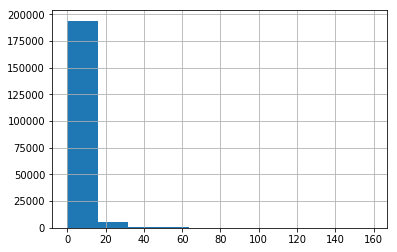

In [29]:

yelp_final_training_data_review_votes.total_review_votes_count.hist(bins=10)

In [51]:
yelp_final_training_data_review_votes.columns

Index(['cool', 'funny', 'useful', 'Review_category_useful_notuseful',
       'Review_category_funny_notfunny', 'Review_category_cool_notcool',
       'Review_category_coolest_funniest_mostuseful',
       'total_review_votes_count'],
      dtype='object')

Feature transform: 
Use the quantile discretizer to categorize the total_review_votes_count relatively event into categories.
The total_review_votes_count_grouping here ranks the reviews based on its quality/popularity and put them into 7 groups:

Here are the 8 groups:

Group 0: revies with 0 vote.

Group 1: reviews with up to 5 votes

Group 2: reviews with greater than 5 votes and less than and equal to 10 votes

Group 3: reviews with greater than 10 votes and less than and equal to 15 votes

Group 4: reviews with greater than 15 votes and less than and equal to 20 votes

Group 5: reviews with greater than 20 votes and less than and equal to 25 votes

Group 6: reviews with greater than 25 votes and less than and equal to 30 votes

Group 7: reviews with over 30 votes


In [583]:
## Group the reviews into cateogies based on the number of votes the review gets

yelp_final_training_data_review_votes.total_review_votes_count

## quantile discretizer for total review count
pd.qcut(yelp_final_training_data_review_votes['total_review_votes_count'], 100, duplicates='drop')

#sortedIncome_qcut=pd.qcut(sortedIncome, 100, duplicates='drop', labels=list(range(78)))

yelp_final_training_data_review_votes['total_review_votes_count'].describe()
pd.qcut(yelp_final_training_data_review_votes['total_review_votes_count'], 10, duplicates='drop')


# group the reviews into the following categories: 0, 0-5, 5-10, 10-15, 15-20, 20-25, 25-30, over 30
yelp_final_training_data_review_votes['total_review_votes_count_grouping']=0
set(yelp_final_training_data_review_votes['total_review_votes_count_grouping'])

yelp_final_training_data_review_votes.loc[yelp_final_training_data_review_votes['total_review_votes_count']==0,'total_review_votes_count_grouping']=0
yelp_final_training_data_review_votes.loc[(yelp_final_training_data_review_votes['total_review_votes_count']>0) & (yelp_final_training_data_review_votes['total_review_votes_count']<=5),'total_review_votes_count_grouping']=1
yelp_final_training_data_review_votes.loc[(yelp_final_training_data_review_votes['total_review_votes_count']>5) & (yelp_final_training_data_review_votes['total_review_votes_count']<=10),'total_review_votes_count_grouping']=2
yelp_final_training_data_review_votes.loc[(yelp_final_training_data_review_votes['total_review_votes_count']>10) & (yelp_final_training_data_review_votes['total_review_votes_count']<=15),'total_review_votes_count_grouping']=3
yelp_final_training_data_review_votes.loc[(yelp_final_training_data_review_votes['total_review_votes_count']>15) & (yelp_final_training_data_review_votes['total_review_votes_count']<=20),'total_review_votes_count_grouping']=4
yelp_final_training_data_review_votes.loc[(yelp_final_training_data_review_votes['total_review_votes_count']>20) & (yelp_final_training_data_review_votes['total_review_votes_count']<=25),'total_review_votes_count_grouping']=5
yelp_final_training_data_review_votes.loc[(yelp_final_training_data_review_votes['total_review_votes_count']>25) & (yelp_final_training_data_review_votes['total_review_votes_count']<=30),'total_review_votes_count_grouping']=6
yelp_final_training_data_review_votes.loc[(yelp_final_training_data_review_votes['total_review_votes_count']>30),'total_review_votes_count_grouping']=7

yelp_final_training_data_review_votes.groupby(['total_review_votes_count_grouping'])['total_review_votes_count_grouping'].count()


total_review_votes_count_grouping
0    72038
1    98745
2    17783
3     5466
4     2556
5     1438
6      881
7     1566
Name: total_review_votes_count_grouping, dtype: int64

Feature transform: yelp_final_training_data_review_votes data set and the yelp_final_training_data_set has been finalized

In [55]:
yelp_final_training_data_review_votes.columns

Index(['cool', 'funny', 'useful', 'Review_category_useful_notuseful',
       'Review_category_funny_notfunny', 'Review_category_cool_notcool',
       'Review_category_coolest_funniest_mostuseful',
       'total_review_votes_count', 'total_review_votes_count_grouping'],
      dtype='object')

In [58]:
yelp_final_training_data_set.columns

Index(['business_id', 'checkin_info', 'business categories', 'business city',
       'full_address', 'latitude', 'longitude', 'business name',
       'neighborhoods', 'open', 'business review_count', 'business stars',
       'business state', 'review date', 'review_id', 'text', 'user_id',
       'review votes', 'user average stars', 'user_name', 'user review_count',
       'user_votes'],
      dtype='object')

Feature transform: Join the yelp_final_training_data_review_votes and yelp_final_training_data_set together into the yelp_data_final data set. 

In [59]:
#join all the review-related columns from the yelp_final_training_data_review_votes data frame with the yelp_final_training_data_set

yelp_review_votes=yelp_final_training_data_review_votes
yelp_data_final=yelp_final_training_data_set.join(yelp_review_votes)

Feature transform: Export the data set into the project folder so that we only need to refer to the exported csv files for further analysis.

In [3]:
# Export the data set into the folder so that every time I just need to read the files
yelp_review_votes.to_csv("/Users/yuka/Desktop/DataScience/Yelp Project/yelp_review_votes_master_data.csv")

yelp_data_final.to_csv("/Users/yuka/Desktop/DataScience/Yelp Project/yelp_data_final_master_data.csv")


NameError: name 'yelp_review_votes' is not defined

Step 3: Further data cleaning and Exploratory Analysis

Business Level data exploratory analysis:

Understand the distribution of the number of business by state and city:
    
There are overall 11,537 business in the data set. 11,534 of the businesses are located in Arizona.
Around 80% of the business in the data set are located in Phoenix, Scottsdale, Tempe, Mesa and Chandler.

In [8]:
yelp_training_set_business['business_id'].count()

11537

Below is the distribution of the businesses by state:

In [11]:
yelp_training_set_business.groupby('state')['business_id'].count()

state
AZ    11534
CA        1
CO        1
SC        1
Name: business_id, dtype: int64

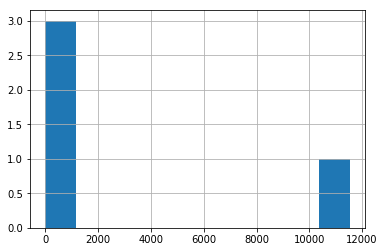

In [13]:
df_bystate=yelp_training_set_business.groupby('state')['business_id'].count()
f = df_bystate.hist();

Below is the distribution of the business by cities:

In [19]:
df_bycity=yelp_training_set_business.groupby('city')['business_id'].count()


In [20]:
df_bycity_for_plot=df_bycity.sort_values(ascending=False)[0:6]

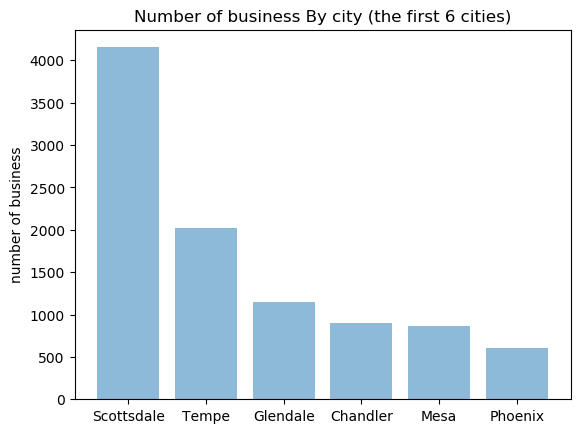

In [21]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
    
objects = set(df_bycity_for_plot.index)
y_pos = np.arange(len(objects))
performance = df_bycity_for_plot.values
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('number of business')
plt.title('Number of business By city (the first 6 cities)')
 
plt.show()

Open business vs Closed business: Around 90% of the business in the dataset are open.

In [22]:
yelp_training_set_business.groupby('open')['business_id'].count()

open
False     1224
True     10313
Name: business_id, dtype: int64

Review count distribution:
A business has 20 reviews on average in teh dataset.
Half of the business have 6 reviews.
75% of the business have up to 16 reviews.
In the dataset, there are also some outliers.

Here's the histogram for the business review count. As you can see, most of businesses have up to 10 reivews.

In [24]:
yelp_training_set_business['review_count'].describe()

count    11537.000000
mean        20.192858
std         43.345024
min          3.000000
25%          4.000000
50%          6.000000
75%         16.000000
max        862.000000
Name: review_count, dtype: float64

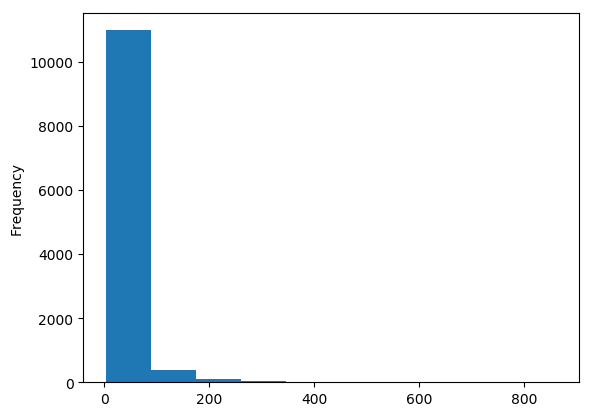

In [25]:
yelp_training_set_business['review_count'].plot(kind='hist')

Below are the outliers:

In [26]:
yelp_training_set_business['review_count'].mean() + 3 *yelp_training_set_business['review_count'].std() #150.22792885523137

yelp_training_set_business.loc[yelp_training_set_business['review_count']>150.22792885523137, 'review_count'].sort_values()[-10:]

8904    525
107     549
3265    575
62      580
7053    594
8283    652
6422    689
3428    735
5498    803
9533    862
Name: review_count, dtype: int64

The business star ranges from 1 to 5. Half of the businesses have up to 3.5 stars. 75% of the businesses have up to 4.5 stars. Below is the histogram for the business star. As you can see most of the businesses have over 3 stars. A lot of the businesses have 3.5 to 4 stars.

In [28]:
yelp_training_set_business['stars'].describe()

count    11537.000000
mean         3.674525
std          0.862407
min          1.000000
25%          3.000000
50%          3.500000
75%          4.500000
max          5.000000
Name: stars, dtype: float64

In [29]:
yelp_training_set_business.groupby('stars')['business_id'].count()

stars
1.0     108
1.5     170
2.0     403
2.5    1011
3.0    1511
3.5    2639
4.0    2674
4.5    1748
5.0    1273
Name: business_id, dtype: int64

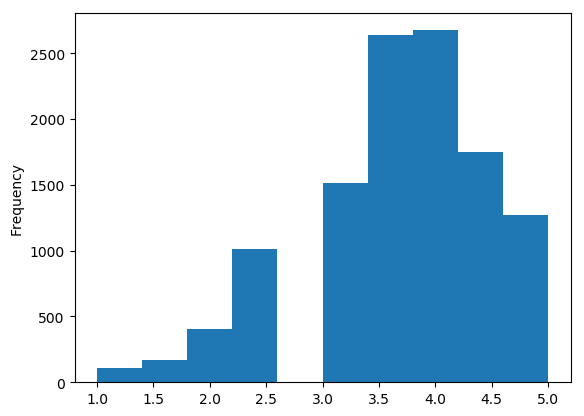

In [30]:
yelp_training_set_business['stars'].plot(kind='hist')

Discover the correlation between review_count of the business and the stars of the business:

The correlation between stars and review count for a business count is 0.055, which means the number of stars a business gets is not closely correlated to the number of reviews the business has.

In [31]:
yelp_training_set_business[['stars', 'review_count']].corr()

,stars,review_count
stars,1.000000,0.055202
review_count,0.055202,1.000000


User level data exploratory analysis: There are overall 43,873 users in the data set.

In [32]:
yelp_training_set_user.count()

average_stars    43873
name             43873
review_count     43873
type             43873
user_id          43873
votes            43873
dtype: int64

Convert the data dictionary "user review votes" to the user review votes data frame

In [ ]:
#Convert the data dictionary "user review votes" to the user review votes data frame
yelp_training_set_user_votes=pd.DataFrame()

for i in range(len(yelp_training_set_user)):
    test = pd.DataFrame(data=yelp_training_set_user["votes"][i], index=[i])
    yelp_training_set_user_votes=yelp_training_set_user_votes.append(test)


In [ ]:
yelp_training_set_user_votes.head()

In [22]:
yelp_training_set_user_votes['total_user_review_votes']=yelp_training_set_user_votes["cool"]+yelp_training_set_user_votes["funny"]+yelp_training_set_user_votes["useful"]

In [37]:
yelp_training_set_user_votes.head()

,cool,funny,useful,total_user_review_votes
0,0,0,7,7
1,0,0,1,1
2,0,0,1,1
3,0,0,2,2
4,0,0,0,0


Here's the distribution of the total user review votes:
Most of the users (75% of the users) have up to 37 votes for their reviews.
There are some outliers. The maximum votes a user can get in the dataset is 70,341.

In [38]:
yelp_training_set_user_votes['total_user_review_votes'].describe()

count    43873.000000
mean       173.620290
std       1406.417362
min          0.000000
25%          2.000000
50%          8.000000
75%         37.000000
max      70341.000000
Name: total_user_review_votes, dtype: float64

Below are the outliers:

In [39]:
yelp_training_set_user_votes['total_user_review_votes'].mean() + 3 *yelp_training_set_user_votes['total_user_review_votes'].std() #4392.8723777299365

yelp_training_set_user_votes.loc[yelp_training_set_user_votes['total_user_review_votes']>150.22792885523137, 'total_user_review_votes'].sort_values()[-20:]

4055     31232
16226    32506
14382    32537
37816    33914
8101     35812
14592    36052
425      37474
35750    37765
7453     37947
2177     40949
17275    41500
2590     43020
27237    44162
41699    54412
39978    54762
33644    60205
30984    60633
37473    61929
33333    63602
8083     70341
Name: total_user_review_votes, dtype: int64

Distribution of the average stars a user has got:
The average star a user can get ranges from 0 to 5.
Half of the users have up to 3.86 average stars. 75% of the users have up to 4.36 average stars.

In [40]:
yelp_training_set_user['average_stars'].describe()

count    43873.000000
mean         3.744078
std          0.965280
min          0.000000
25%          3.330000
50%          3.860000
75%          4.360000
max          5.000000
Name: average_stars, dtype: float64

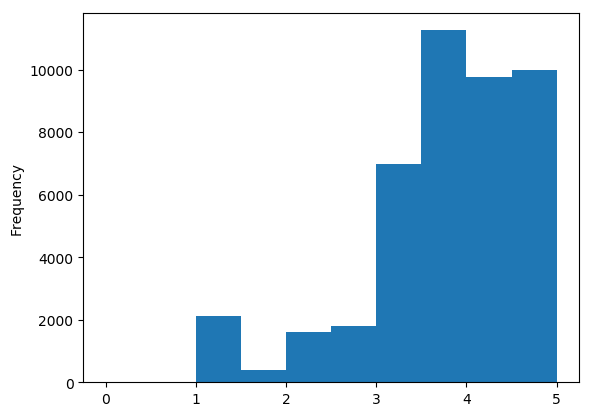

In [41]:
yelp_training_set_user['average_stars'].plot(kind='hist')

Distribution of the user review count:
Half of the users have posted up to  7 reviews. 75% of the users have posted up to 23 reviews. There are some outliers. The maximum number of reviews a user has posted is 5,807.

In [42]:
yelp_training_set_user['review_count'].describe()

count    43873.000000
mean        38.858729
std        117.907082
min          1.000000
25%          2.000000
50%          7.000000
75%         23.000000
max       5807.000000
Name: review_count, dtype: float64

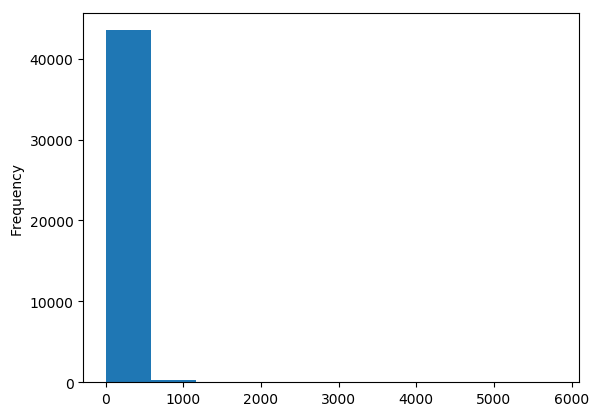

In [43]:
yelp_training_set_user['review_count'].plot(kind='hist')

Below are the outliers:

In [44]:
yelp_training_set_user['review_count'].mean()+yelp_training_set_user['review_count'].std()*3 #392.57997380988644
yelp_training_set_user.loc[yelp_training_set_user['review_count']>392.57997380988644,'review_count'].sort_values()[-15:]

12596    1914
25948    1977
8010     1995
30984    2012
34263    2038
24896    2100
25116    2109
20762    2191
27960    2274
20315    2448
8083     2587
17275    2760
7421     2810
5087     2848
1833     5807
Name: review_count, dtype: int64

In [74]:
yelp_training_set_user.columns

Index(['average_stars', 'name', 'review_count', 'type', 'user_id', 'votes'], dtype='object')

By looking at the correlation below, you will find:

- The number of "useful" votes a user has got is closely related to the number of reviews the user has posted (the R squared is 70%)

- The number of "cool" votes a user has got is also related to the number of reviews user has posted (the R squared is around 65%)

- Also, you the "cool" , "funny" and "useful" votes are very closely related to each other with R squared over 90%, which might suggest that a lot of the users in the dataset usually get all these three types of votes for their reviews instead of just getting votes in one or two specific categories.

- Unexpectedly, the averge stars a user has got is negatively related to the total number of reviews. The review votes has a very weak relationship with the average star user has got.

In [79]:
yelp_training_set_user[['average_stars', 'review_count']].join(yelp_training_set_user_votes).corr()

,average_stars,review_count,cool,funny,useful,total_user_review_votes
average_stars,1.000000,-0.006717,0.005040,0.001770,0.001616,0.002814
review_count,-0.006717,1.000000,0.644072,0.595040,0.700362,0.657078
cool,0.005040,0.644072,1.000000,0.972417,0.991527,0.996875
funny,0.001770,0.595040,0.972417,1.000000,0.960693,0.983621
useful,0.001616,0.700362,0.991527,0.960693,1.000000,0.993983
total_user_review_votes,0.002814,0.657078,0.996875,0.983621,0.993983,1.000000


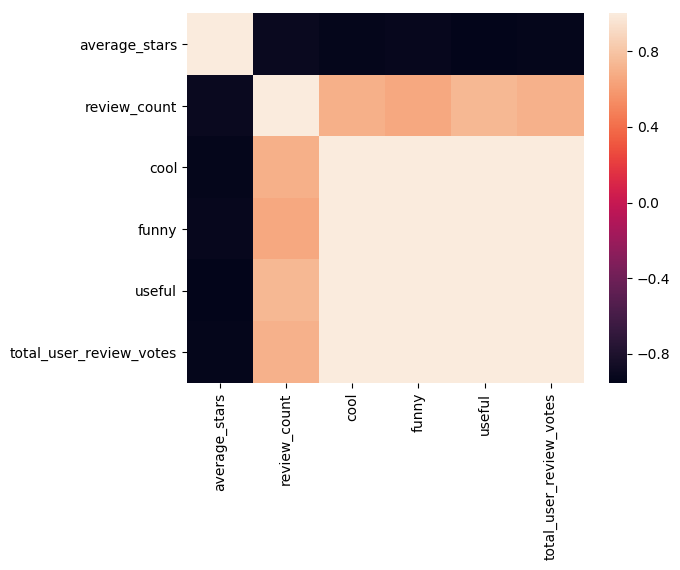

In [80]:
import seaborn as sb
##heatmap:
sb.heatmap(yelp_training_set_user[['average_stars', 'review_count']].join(yelp_training_set_user_votes).corr().corr())


Checkin data exploratory analysis:

There are overall 8,282 business in the data.

In [45]:
yelp_training_set_checkin.count()

business_id     8282
checkin_info    8282
type            8282
dtype: int64

In [81]:
yelp_training_set_checkin.columns

Index(['business_id', 'checkin_info', 'type'], dtype='object')

Convert the data dictionary "checkin info" to checkin info data frame:

In [ ]:
#Convert the data dictionary "checkin info" to checkin info data frame:
yelp_training_set_checkin_info=pd.DataFrame()

for i in range(len(yelp_training_set_checkin)):
    test = pd.DataFrame(data=yelp_training_set_checkin["checkin_info"][i], index=[i])
    yelp_training_set_checkin_info=yelp_training_set_checkin_info.append(test)

In [ ]:
yelp_training_set_checkin_info.fillna(0, inplace=True)
yelp_training_set_checkin_info.head()


,0-0,0-1,0-2,0-3,0-4,0-5,0-6,1-0,1-1,1-2,...,8-4,8-5,8-6,9-0,9-1,9-2,9-3,9-4,9-5,9-6
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0
1,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
yelp_training_set_checkin_info.columns
yelp_training_set_checkin_info['total_number_of_checkins']=yelp_training_set_checkin_info.apply(sum, axis=1)

Distribution of the total number of checkins:

On average, a business has 94 checkins. Half of the businesses has up to 30 checkins. 75% of the business have up to 91 checkins. There are outliers. The maximum number of the checkins a business gets is 22,977.

In [49]:
yelp_training_set_checkin_info['total_number_of_checkins'].describe()

count     8282.000000
mean        94.299928
std        314.256965
min          3.000000
25%         11.000000
50%         30.000000
75%         91.000000
max      22977.000000
Name: total_number_of_checkins, dtype: float64

In [50]:
yelp_training_set_checkin_info['total_number_of_checkins'].mean()+yelp_training_set_checkin_info['total_number_of_checkins'].std()*3 #1037.070823659003  

1037.070823659003

In [51]:
yelp_training_set_checkin_info.loc[yelp_training_set_checkin_info['total_number_of_checkins']>1037.070823659003,'total_number_of_checkins'].sort_values()[-15:]

6047     1613.0
7254     1637.0
4755     1682.0
346      1682.0
7419     1839.0
5962     1917.0
326      1919.0
7586     1994.0
6317     2043.0
6806     2617.0
2978     2778.0
2714     3279.0
3144     3712.0
1812     4007.0
368     22977.0
Name: total_number_of_checkins, dtype: float64

Exploratory analysis on the final analytics dataset: yelp_data_final_update

In [3]:
#Import the data from the file:
yelp_review_votes=pd.read_csv("/Users/yuka/Desktop/DataScience/Yelp Project/yelp_review_votes_master_data.csv", encoding='utf-8-sig')
yelp_data_final=pd.read_csv("/Users/yuka/Desktop/DataScience/Yelp Project/yelp_data_final_master_data.csv", encoding='utf-8-sig')

There are 2 null values for for text colmun. So we need to drop the rows with 'NULL' text

In [ ]:
yelp_data_final_update=yelp_data_final

In [ ]:
yelp_data_final_update.loc[yelp_data_final_update.text.isnull(),'text']

In [ ]:
yelp_data_final_update=yelp_data_final_update.loc[yelp_data_final_update.text.isnull()==False,]
yelp_data_final_update = yelp_data_final_update.drop('Unnamed: 0', 1)

In [18]:
len(yelp_data_final_update) 



200471

Get the number of unique values in each column for yelp_data_final:

In [61]:
for col in yelp_data_final_update:
    print ("%-20s: %7d uniques" % (col, yelp_data_final_update[col].nunique()))

business_id         :    8281 uniques
checkin_info        :    8281 uniques
business categories :    1587 uniques
business city       :      59 uniques
full_address        :    7537 uniques
latitude            :    6766 uniques
longitude           :    6775 uniques
business name       :    5497 uniques
neighborhoods       :       1 uniques
open                :       2 uniques
business review_count:     293 uniques
business stars      :       9 uniques
business state      :       2 uniques
review date         :    2484 uniques
review_id           :  200471 uniques
text                :  200297 uniques
user_id             :   41005 uniques
review votes        :    2382 uniques
user average stars  :     329 uniques
user_name           :    7968 uniques
user review_count   :     848 uniques
user_votes          :   12552 uniques
cool                :      51 uniques
funny               :      49 uniques
useful              :      50 uniques
Review_category_useful_notuseful:       2 uniques

Based on the data that is provided and transformed, below is the data dictonary for the variables I'm probably going to use for the analysis:

Variable | Description | Type of Variable | Comment
---| ---| ---| ---|
business_id |unique identifier for the business. | text string | Overall 8281 business in the dataset
business categories | Categories of the business | categorical | Overall 1587 business categories. Example value:['Delis', 'Restaurants']
business city  | The city where the business is located | categorical |  59 unque cities. Example value: Youngtown
latitude | latitude of the business | continuous | |
longitude| longitude of the business| continuous | |
business name | Name of the business| categorical| Overall 5497 unique business names, business name to business id is one to many relationship
open | whether the business is open or closed| categorical| two unique values: True/False
business review_count | # of reviews a business has got so far | continuous||
business stars  | # stars a business has got | categorical| 1 ~ 5|
review date | the date when the review was posted | date ||
review_id | the id of the reviews | text string | Overall 200471 unique reviews |
text | text of the reviews | text string | Overall 200297 unique review texts|
user_id | User id |text string | Overall 41005 users |
user average stars | the Average Star user has got | categorical| 0  ~ 5 |
user review_count | # of reviews user has posted on Yelp | continuous | |
user_votes | # of votes user has got for his/her reviews|continuous ||
Review_category_useful_notuseful | indicate whether the review is useful or not | categorical| 2 unique groups: useful vs not useful (1 vs 0)|
Review_category_funny_notfunny | indicate whether the review is funny or not | categorical| 2 unique groups: funny vs not funny (1 vs 0 )|
Review_category_cool_notcool| indicate whether the review is cool or not|categorical| 2 unique groups: cool vs not cool (1 vs 0)|
Review_category_coolest_funniest_mostuseful | indicate whether the review is relatively useful, cool, funny or neutral|categorical|  6 uniques groupings: funnies, coolest, most useful, neutral, no categorization(the last one will be ignored in the analysis)|
total_review_votes_count| total # of votes for the review|continuous||
total_review_votes_count_grouping| tier of the votes based on the vote volume | continuous| 8 unique tiers|





Exploratory Analysis: Review distribution

There are overall 200,471 reviews in the dataset. The average review vote is around 3. 75% of the reviews have up to 3 review votes.

In [69]:
yelp_data_final_update['total_review_votes_count'].describe()

count    200471.000000
mean          2.954572
std           5.631105
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max         159.000000
Name: total_review_votes_count, dtype: float64

In [70]:
yelp_data_final_update['total_review_votes_count'].mean() + yelp_data_final_update['total_review_votes_count'].std()*3

19.847885908532277

Below are  some examples of the outliers for the total_review_votes_count:

In [71]:
yelp_data_final_update.loc[yelp_data_final_update['total_review_votes_count']>19.847885908532277, 'total_review_votes_count'].sort_values()[-20:]

159485     98
87338      99
47450     100
168681    100
1654      102
120625    110
199493    112
51588     114
26039     115
151851    117
127819    127
147297    132
163332    132
30753     133
30400     133
160737    134
78606     135
22696     135
103951    147
131561    159
Name: total_review_votes_count, dtype: int64

In [82]:
yelp_training_set_checkin_info.head()


,0-0,0-1,0-2,0-3,0-4,0-5,0-6,1-0,1-1,1-2,...,8-5,8-6,9-0,9-1,9-2,9-3,9-4,9-5,9-6,total_number_of_checkins
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,223.0
1,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,45.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


Rename the columns for the yelp_training_set_user_votes

In [84]:
yelp_training_set_user_votes.head()
yelp_training_set_user_votes.rename(columns={'funny': 'user_level_votes_funny', 'cool': 'user_level_votes_cool','useful': 'user_level_votes_useful', 'total_user_review_votes':'total_user_level_review_votes'}, inplace=True)

In [85]:
yelp_training_set_user_votes.head()

,user_level_votes_cool,user_level_votes_funny,user_level_votes_useful,total_user_level_review_votes
0,0,0,7,7
1,0,0,1,1
2,0,0,1,1
3,0,0,2,2
4,0,0,0,0


In [86]:
yelp_training_set_checkin_info.head()

,0-0,0-1,0-2,0-3,0-4,0-5,0-6,1-0,1-1,1-2,...,8-5,8-6,9-0,9-1,9-2,9-3,9-4,9-5,9-6,total_number_of_checkins
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,223.0
1,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,45.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


Join the yelp_data_final_update with the check in info data:

In [19]:
yelp_data_final_update=yelp_data_final_update.join(yelp_training_set_checkin_info['total_number_of_checkins'])

Join the yelp_data_final_update with the user level review votes data:

In [24]:
yelp_data_final_update.head()

,business_id,checkin_info,business categories,business city,full_address,latitude,longitude,business name,neighborhoods,open,...,cool,funny,useful,Review_category_useful_notuseful,Review_category_funny_notfunny,Review_category_cool_notcool,Review_category_coolest_funniest_mostuseful,total_review_votes_count,total_review_votes_count_grouping,total_number_of_checkins
0,KO9CpaSPOoqm0iCWm5scmg,"{'11-3': 17, '8-5': 1, '15-0': 2, '15-3': 2, '...","['Sandwiches', 'Restaurants']",Scottsdale,"4020 N Scottsdale Rd\nSte 102\nScottsdale, AZ ...",33.494242,-111.926447,Sandwich Club,[],False,...,0,0,1,not useful,not funny,not cool,useful,1,1,223.0
1,KO9CpaSPOoqm0iCWm5scmg,"{'11-3': 17, '8-5': 1, '15-0': 2, '15-3': 2, '...","['Sandwiches', 'Restaurants']",Scottsdale,"4020 N Scottsdale Rd\nSte 102\nScottsdale, AZ ...",33.494242,-111.926447,Sandwich Club,[],False,...,0,0,1,not useful,not funny,not cool,useful,1,1,29.0
2,KO9CpaSPOoqm0iCWm5scmg,"{'11-3': 17, '8-5': 1, '15-0': 2, '15-3': 2, '...","['Sandwiches', 'Restaurants']",Scottsdale,"4020 N Scottsdale Rd\nSte 102\nScottsdale, AZ ...",33.494242,-111.926447,Sandwich Club,[],False,...,4,0,3,useful,not funny,cool,cool,7,2,45.0
3,KO9CpaSPOoqm0iCWm5scmg,"{'11-3': 17, '8-5': 1, '15-0': 2, '15-3': 2, '...","['Sandwiches', 'Restaurants']",Scottsdale,"4020 N Scottsdale Rd\nSte 102\nScottsdale, AZ ...",33.494242,-111.926447,Sandwich Club,[],False,...,5,1,7,useful,funny,cool,useful,13,3,21.0
4,KO9CpaSPOoqm0iCWm5scmg,"{'11-3': 17, '8-5': 1, '15-0': 2, '15-3': 2, '...","['Sandwiches', 'Restaurants']",Scottsdale,"4020 N Scottsdale Rd\nSte 102\nScottsdale, AZ ...",33.494242,-111.926447,Sandwich Club,[],False,...,1,1,2,useful,funny,cool,useful,4,1,6.0


In [26]:
yelp_data_final_update=yelp_data_final_update.join(yelp_training_set_user_votes['total_user_review_votes'])

Discover the correlation between the attributes in the analytical dataset yelp_data_final_update:

In [100]:
yelp_data_final_update.corr()

,latitude,longitude,open,business review_count,business stars,user average stars,user review_count,cool,funny,useful,total_review_votes_count,total_review_votes_count_grouping,total_number_of_checkins,user_level_votes_cool,user_level_votes_funny,user_level_votes_useful,total_user_level_review_votes
latitude,1.000000,-0.383586,-0.024668,-0.046309,0.001624,0.002661,0.022437,0.018803,0.016236,0.024616,0.021616,0.024734,-0.021593,0.000105,0.001275,0.000925,0.000759
longitude,-0.383586,1.000000,-0.001355,-0.023495,0.016398,0.012156,0.001046,-0.033259,-0.031163,-0.042140,-0.038493,-0.045450,0.017397,0.000357,-0.000172,-0.000002,0.000069
open,-0.024668,-0.001355,1.000000,0.103021,0.092393,0.005211,-0.003802,-0.017396,-0.014368,-0.017367,-0.017641,-0.017333,0.003493,-0.012987,-0.011618,-0.013000,-0.012705
business review_count,-0.046309,-0.023495,0.103021,1.000000,0.204378,0.041640,-0.011631,0.042373,0.019632,0.035480,0.035157,0.038221,-0.010759,-0.007332,-0.008745,-0.006704,-0.007552
business stars,0.001624,0.016398,0.092393,0.204378,1.000000,0.168398,-0.037988,0.036776,-0.022961,0.011783,0.009682,0.006534,0.015422,-0.002136,-0.001195,-0.002270,-0.001936
user average stars,0.002661,0.012156,0.005211,0.041640,0.168398,1.000000,-0.023009,0.023235,-0.018122,-0.006851,-0.000745,-0.008015,-0.015781,0.005502,0.006625,0.005612,0.005911
user review_count,0.022437,0.001046,-0.003802,-0.011631,-0.037988,-0.023009,1.000000,0.338269,0.271084,0.322750,0.334341,0.343284,-0.009176,-0.006174,-0.006367,-0.005577,-0.006047
cool,0.018803,-0.033259,-0.017396,0.042373,0.036776,0.023235,0.338269,1.000000,0.790660,0.877032,0.954300,0.854180,-0.006560,-0.000957,-0.000167,-0.000171,-0.000433
funny,0.016236,-0.031163,-0.014368,0.019632,-0.022961,-0.018122,0.271084,0.790660,1.000000,0.737725,0.896744,0.800362,-0.006759,-0.000084,0.000445,0.000703,0.000373
useful,0.024616,-0.042140,-0.017367,0.035480,0.011783,-0.006851,0.322750,0.877032,0.737725,1.000000,0.943061,0.894252,-0.002659,0.002167,0.003538,0.002967,0.002888


By looking at the correlation between the fields within the final dataset, here's the finding:

- Useful, funny and cool votes for the reviews are closedly related, which suggests that the reviews in the dataset usually get the votes from all these three categories instead of just getting the votes in one or two of the categories.

- The count of the user reviews is related with the total number of review votes with an R squared of over 30%, which might indicate the user that posts more reviews are more likely to get more votes.


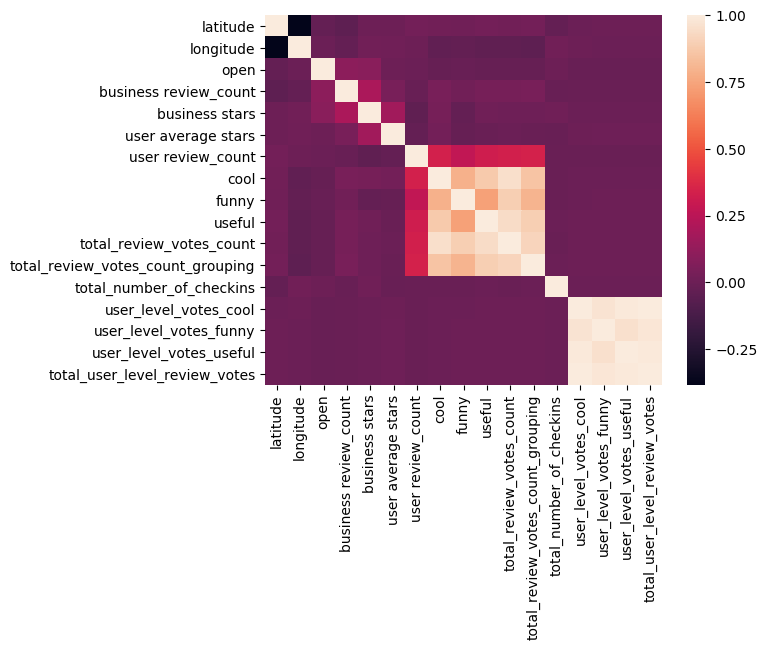

In [101]:
import seaborn as sb
##heatmap:
sb.heatmap(yelp_data_final_update.corr())

Number of reviews by groupings:

30% of the reviews are useful.

In [5]:
yelp_data_final_update.groupby('Review_category_useful_notuseful')['review_id'].count()

Review_category_useful_notuseful
not useful    140336
useful         60135
Name: review_id, dtype: int64

30 % of the reviews are funny.

In [10]:
yelp_data_final_update.groupby('Review_category_funny_notfunny')['review_id'].count()

Review_category_funny_notfunny
funny         59616
not funny    140855
Name: review_id, dtype: int64

37 % of the reviews are cool

In [13]:
yelp_data_final_update.groupby('Review_category_cool_notcool')['review_id'].count()

Review_category_cool_notcool
cool         74685
not cool    125786
Name: review_id, dtype: int64

Here's the percentage distribution based on the Review_category_coolest_funniest_mostuseful field:

Review Category | Percentage | 
---| ---| 
Relatively cool |5% | 
Relatively funny | 6%|
Relatively useful | 3.5%|
neutral| 5%|
no categorization | 12%|
no review vote| 36%|

There are around 36% percent of the reviews that do not have vote.

In [14]:
yelp_data_final_update.groupby('Review_category_coolest_funniest_mostuseful')['review_id'].count()


Review_category_coolest_funniest_mostuseful
cool                 10580
funny                11180
neutral              10953
no categorization    24443
no review            72036
useful               71279
Name: review_id, dtype: int64

In [15]:

yelp_data_final_update.groupby('total_review_votes_count_grouping')['review_id'].count()


total_review_votes_count_grouping
0    72036
1    98745
2    17783
3     5466
4     2556
5     1438
6      881
7     1566
Name: review_id, dtype: int64


Here's the percentage distribution based on the total review count grouping field:

Review Category | Percentage | 
---| ---| 
Tier 0 | 36% | 
Tier 1 | 49%|
Tier 2 | 9%|
Tier 3 | 3%|
Tier 4 | 1%|
Tier 5 | 0.7%|
Tier 6 | 0.4%|
Tier 7 | 0.8%|


Most of the reviews  has 0 to 5 votes.


Text analysis of the review: 

Use world cloud visualization to identify the keywords that appear most frequently in the reviews from the dataset:

In [316]:
import PIL.Image

In [317]:
cv = CountVectorizer(min_df=50,stop_words="english", max_features=1000)
counts = cv.fit_transform(X_text_train).toarray().ravel()                                                  
words = np.array(cv.get_feature_names()) 
# normalize                                                                                                                                             
counts = counts / float(counts.max())

Below is the word cloud for all the reviews:

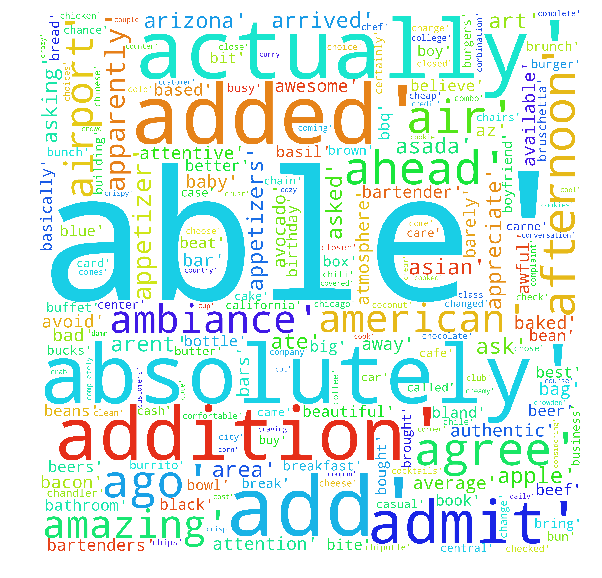

In [318]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
#Convert all the required text into a single string here 
#and store them in word_string

word_string=np.array_str(words)

#you can specify fonts, stopwords, background color and other options

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=5000,
                          height=5000
                         ).generate(word_string)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Below is the word cloud for the reviews that have been votes as cool:

In [321]:
X_text_train_cool=yelp_data_final_update.loc[yelp_data_final_update['Review_category_cool_notcool_binary']==1, 'text']

In [324]:
cv = CountVectorizer(min_df=50,stop_words="english", max_features=1000)
counts = cv.fit_transform(X_text_train_cool).toarray().ravel()                                                  
words = np.array(cv.get_feature_names()) 
# normalize                                                                                                                                             
counts = counts / float(counts.max())



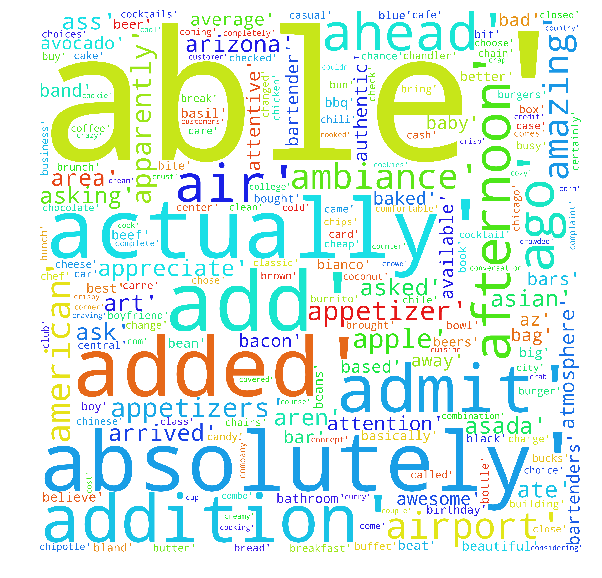

In [325]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
#Convert all the required text into a single string here 
#and store them in word_string

word_string=np.array_str(words)

#you can specify fonts, stopwords, background color and other options

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=5000,
                          height=5000
                         ).generate(word_string)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Below is the word cloud for the reviews that have been votes as useful:

In [326]:
X_text_train_useful=yelp_data_final_update.loc[yelp_data_final_update['Review_category_useful_notuseful_binary']==1, 'text']

In [352]:
X_text_train_useful=X_text_train_useful.apply(func_remove_numbers)

In [353]:
cv = CountVectorizer(min_df=50,stop_words="english", max_features=1000)
counts = cv.fit_transform(X_text_train_useful).toarray().ravel()                                                  
words = np.array(cv.get_feature_names()) 
# normalize                                                                                                                                             
counts = counts / float(counts.max())



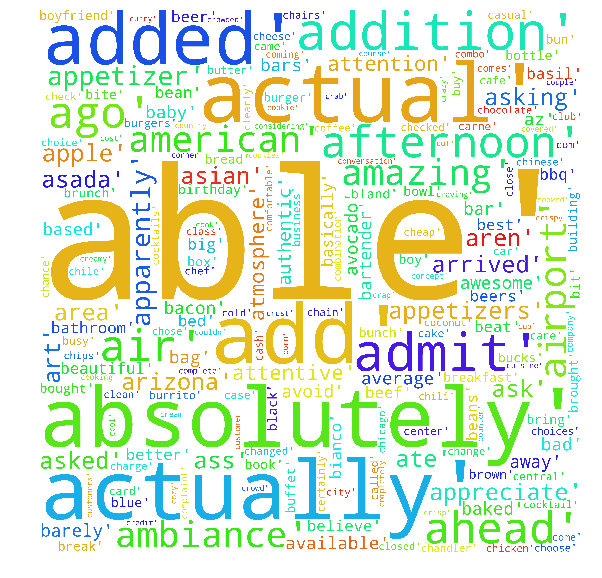

In [354]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
#Convert all the required text into a single string here 
#and store them in word_string

word_string=np.array_str(words)

#you can specify fonts, stopwords, background color and other options

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=5000,
                          height=5000
                         ).generate(word_string)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Below is the word cloud for the reviews that have been votes as funny:

In [355]:
X_text_train_funny=yelp_data_final_update.loc[yelp_data_final_update['Review_category_funny_notfunny_binary']==1, 'text']

In [356]:
X_text_train_funny=X_text_train_funny.apply(func_remove_numbers)

In [357]:
cv = CountVectorizer(min_df=50,stop_words="english", max_features=1000)
counts = cv.fit_transform(X_text_train_funny).toarray().ravel()                                                  
words = np.array(cv.get_feature_names()) 
# normalize                                                                                                                                             
counts = counts / float(counts.max())



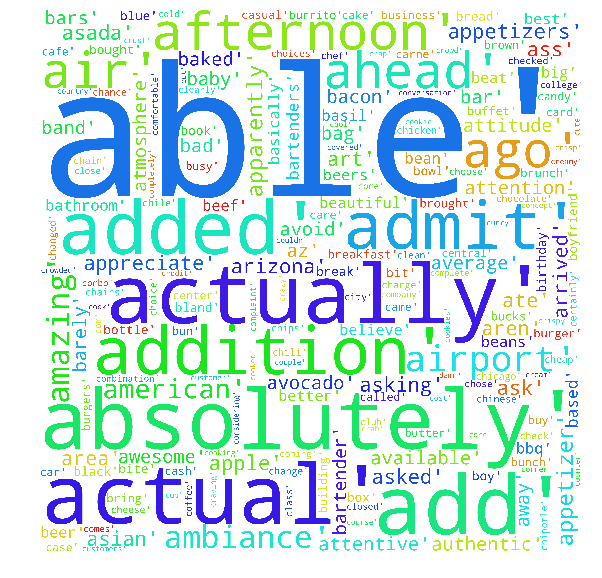

In [359]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
#Convert all the required text into a single string here 
#and store them in word_string

word_string=np.array_str(words)

#you can specify fonts, stopwords, background color and other options

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=5000,
                          height=5000
                         ).generate(word_string)



plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Explore the final data set for modeling into the csv so that we can use it later:

In [28]:


yelp_data_final_update.to_csv("/Users/yuka/Desktop/DataScience/Yelp Project/yelp_data_final_master_data_formodeling.csv")


Step 4: Model

Below is the summary on the models used and the next steps:


Model | Objective | y variable used | x Variables used | Approach| Metric to evaluate the model | Analysis outcome | Next Step |
---| ---| ---| ---|---|
Model 1   |identify impact of the review kws on users' votes on the reviews| useful or not/cool or not/ funny or not | Review text strings transformed by count vectorizer & tfidf vectorizer | Naive Bayes, Random Forest and Logistic Regressions |Accuracy rate and ROC AUC| Accuracy Rate and ROC AUC are around 60 - 70 %. Identified some important kws with positive/negative impact on the classfication.| Clean up the text using more advanced techniques like stemming the word. Acquire more reivew data from other state for further analysis.
Model 2  | identify impact of the review kws on users' votes on the reviews| useful, cool, funny and neutral |Review text strings transformed by count vectorizer & tfidf vectorizer|Naive Bayes|Accuracy rate| Accuracy rate is around 40%. It's not as good as a random guess.| relabel the data using better rules. Acquire more reivew data from other state for further analysis.
Model 3  | Classify the reviews into 0 to 7 (8 tiers) based on the number of votes the reviews have got| 8 tiers based on the number of review votes |  Review text strings transformed by tfidf vectorizer|Naive Bayes|Accuracy rate| Accuracy rate is around 50%. It's not as good as a random guess.|relabel the data using fewer tiers.Acquire more reivew data from other state for further analysis.
Model 4   | classify the reviews into two groups (review votes above average & below average) | Two classes (review votes above average & below average) |Review text strings transformed by tfidf vectorizer |Naive Bayes and logistic Regression|Accuracy rate and ROC AUC|  Accuracy Rate and ROC AUC are around 60 - 70 %. Identified some important kws with positive/negative impact on the classfication. |Clean up the text using more advanced techniques like stemming the word. use the top positive kws to create dummy variables for the regression model
Model 5  |  Predict the total number of review votes | total number of review votes |user review_count,review_recency, text_string_length, all the dummies created based on the most important features that classfy the reviews into two groups (reviews above average & below average)| Regression Model|R Squared| R squared is 21%. Still got a lot of room to improve the model. Other than the text in the reviews, I've identified some positive correlation between review_count,review_recency, text_string_length and total review votes count | After looking at the discussion on Kaggle, below are the variables that we are going to use:#number_of_caps in the review text, #number_of_paragraphs, #number_of_punctuation_marks and numbers of categories a business is, #number_of_insult_words

Import the analytical dataset:

In [40]:
yelp_data_final_update=pd.read_csv("/Users/yuka/Desktop/DataScience/Yelp Project/yelp_data_final_master_data_formodeling.csv")

Modeling Session 1: 

Identify the impact of the keywords on users' perception on the reviews to be funny, useful or cool. 

In [41]:
X_text_train=yelp_data_final_update["text"]

In [42]:
import string
from sklearn.feature_extraction.text import TfidfTransformer


Define and Apply the  function to get rid of the punction from the review text for better tokenization

In [43]:
len(X_text_train)

200471

In [545]:
def func_exclude_punctuation(text_string):
    exclude = set(string.punctuation)
    s = ''.join(ch for ch in text_string if ch not in exclude)
    return s

#Apply the function to exclude the punctuation for all the review texts:

X_text_train=X_text_train.apply(func_exclude_punctuation)

Define and Apply the function to remove the "\n" in the text string

In [544]:
def func_remove_n(text_string):
    return text_string.replace('\n', '')
    
#Apply the function to exclude all "\n"  for all the review texts:
X_text_train=X_text_train.apply(func_remove_n)

Define and apply the function to convert all the Upper case string to lower case string

In [542]:
def func_to_lower_case(text_string):
    return text_string.lower()
    
#Apply the function to exclude all "\n"  for all the review texts:
X_text_train=X_text_train.apply(func_to_lower_case)

In [543]:
def func_remove_numbers(text_string):
    return ''.join(i for i in text_string if not i.isdigit())
    
#Apply the function to exclude all numbers in the reviews:
X_text_train=X_text_train.apply(func_remove_numbers)


Use the count vectorizer transformer to convert the review text to the vectors

In [252]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range =(1,3), stop_words='english', min_df=50)
X_train_countVectorizer = cv.fit_transform(X_text_train)
X_train_countVectorizer.shape #(200471, 31193)

(200471, 31193)

Use the tfidf transformer to convert the review text to the vectors

In [253]:
## Use the tfidf transformer to convert the review text to the vectors:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_transformer = TfidfVectorizer(ngram_range =(1,3), stop_words='english', lowercase=True, min_df=50)
X_text_train_tfidf = tfidf_transformer.fit_transform(X_text_train)
X_text_train_tfidf.shape #(200471, 31193) # 200471 samples with 31193 features

(200471, 31193)

Modeling Sessions 1: Approach A Native Bayes


Naive Bayes can help me identify which keywords within the review texts are having positive/negative in getting votes in useful, funny and cool these three categories.

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import cross_val_score

model_NB = MultinomialNB()


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Naive Bayes model on useful vs not useful:

To populate the roc auc score, need to convert the Review_category_useful_notuseful to binary 1 (useful) versus 0 (not useful)

In [104]:
yelp_data_final_update['Review_category_useful_notuseful'].head()

yelp_data_final_update['Review_category_useful_notuseful_binary']=0

yelp_data_final_update.loc[yelp_data_final_update['Review_category_useful_notuseful']=='useful','Review_category_useful_notuseful_binary']=1

yelp_data_final_update.loc[yelp_data_final_update['Review_category_useful_notuseful']=='not useful','Review_category_useful_notuseful_binary']=0


In [26]:
cross_val_score(model_NB, X_train_countVectorizer, yelp_data_final_update['Review_category_useful_notuseful_binary'], cv=10, scoring='roc_auc')
#array([ 0.66189206,  0.63829424,  0.65033012,  0.65211557,  0.63730785, 0.64958811,  0.65830795,  0.6462846 ,  0.65026588,  0.65560582])

array([ 0.66189206,  0.63829424,  0.65033012,  0.65211557,  0.63730785,
        0.64958811,  0.65830795,  0.6462846 ,  0.65026588,  0.65560582])

In [74]:
X_train_countVectorizer #200471x31395

<200471x31395 sparse matrix of type '<class 'numpy.int64'>'
	with 12090169 stored elements in Compressed Sparse Row format>

In [28]:
np.asarray(yelp_data_final_update['Review_category_useful_notuseful']).shape

(200471,)

In [72]:
np.asarray(yelp_data_final_update['Review_category_useful_notuseful']).shape

len(yelp_data_final_update['Review_category_useful_notuseful'])

200471

In [79]:
set(yelp_data_final_update['Review_category_useful_notuseful'])

{'not useful', 'useful'}

In [77]:
model_NB.coef_.shape

(1, 14929497)

In [40]:
model_NB.fit(X_train_countVectorizer, np.asarray(yelp_data_final_update['Review_category_useful_notuseful_binary']))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [44]:
set(yelp_data_final_update['Review_category_useful_notuseful'])

{'not useful', 'useful'}

In [45]:
print (model_NB.feature_count_)

model_NB.feature_count_.shape

[[ 6366.    53.   159. ...,    49.    75.    70.]
 [ 4467.    35.    74. ...,    25.    33.    77.]]


(2, 31395)

In [34]:
print (model_NB.coef_)

model_NB.coef_.shape

[[ -7.13007289 -11.95125011 -11.21728093 ..., -12.27667251 -12.00840852
  -11.17806022]]


(1, 31395)

In [62]:
len(cv.get_feature_names())

14929497

In [52]:
print (model_NB.classes_) #['not useful' 'useful']

['not useful' 'useful']


In [41]:
import pandas as pd
coef_useful_not_useful = pd.DataFrame(model_NB.coef_, columns=cv.get_feature_names()).T

In [36]:
coef_useful_not_useful.head()

,0
10,-7.130073
10 15,-11.951250
10 bucks,-11.217281
10 days,-12.100782
10 different,-11.821197


In [42]:
top = 50
for col in coef_useful_not_useful:
    s = coef_useful_not_useful[[col]].sort_values(col)
    print ("%-20s  (+) %s" % (col, ", ".join(s.iloc[-top:].index)))
    print ("%-20s  (-) %s" % ("", ", ".join(s.iloc[:top].index)))

0                     (+) friendly, sure, sauce, new, pizza, salad, fresh, come, lunch, say, better, want, right, came, night, cheese, going, went, did, way, make, think, chicken, order, bar, didnt, try, best, restaurant, pretty, ordered, menu, know, people, nice, ive, got, love, little, service, im, dont, time, really, great, just, food, like, good, place
                      (-) food great ambiance, good seating, great food atmosphere, staff best, good wait staff, ahi tuna sandwich, burgers delicious, wife chicken, awesome food great, excellent service good, place yummy, yum love, food great beer, times food good, yummy service, favorite sushi place, best indian food, overall good place, excellent food service, planning going, great food drinks, best staff, toppings want, great going, places tempe, food awesome service, great bartender, consistent food, place food great, food decent price, food old, time lot, good food friendly, hour sushi, food good love, happy hour sushi, love guy

Use the features trained by tfidf vectorizer for the Naive Bayes Model: Useful vs not useful

In [53]:
model_NB.fit(X_text_train_tfidf, np.asarray(yelp_data_final_update['Review_category_useful_notuseful']))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [40]:
cross_val_score(model_NB, X_text_train_tfidf, yelp_data_final_update['Review_category_useful_notuseful_binary'], cv=5,  scoring='roc_auc')
#array([ 0.67294306,  0.67758351,  0.6681983 ,  0.67574783,  0.67648373])

array([ 0.67294306,  0.67758351,  0.6681983 ,  0.67574783,  0.67648373])

In [54]:
import pandas as pd
coef_useful_not_useful_tfidf = pd.DataFrame(model_NB.coef_, columns=tfidf_transformer.get_feature_names()).T

In [55]:
top = 50
for col in coef_useful_not_useful_tfidf:
    s = coef_useful_not_useful_tfidf[[col]].sort_values(col)
    print ("%-20s  (+) %s" % (col, ", ".join(s.iloc[-top:].index)))
    print ("%-20s  (-) %s" % ("", ", ".join(s.iloc[:top].index)))

0                     (+) delicious, staff, new, come, friendly, salad, fresh, came, say, right, want, better, did, went, going, night, lunch, cheese, way, didnt, make, pizza, ordered, order, think, restaurant, try, menu, pretty, chicken, know, best, bar, got, people, nice, ive, little, love, service, im, dont, time, really, great, just, food, like, good, place
                      (-) food great ambiance, ahi tuna sandwich, good seating, hour sushi, happy hour sushi, best indian food, wife chicken, great pho, good ribs, great bartender, chickenthe, toppings want, staff best, like spicy food, tables got, planning going, overall good place, tried thai, yummy service, place yummy, service staff friendly, time lot, phoenix week, periods time, places nearby, appetizer delicious, good wait staff, hampton, rice nice, pay just, chicken entree, location north, food old, just moved area, spinach pizza, crusted chicken, great wife, great food atmosphere, wasnt huge fan, beef little, pork burrit

Naive Bayes model on cool vs not cool:

To populate the roc auc score, need to convert the Review_category_cool_notcool to binary 1 (cool) versus 0 (not cool)

In [105]:
yelp_data_final_update['Review_category_cool_notcool'].head()

yelp_data_final_update['Review_category_cool_notcool_binary']=0

yelp_data_final_update.loc[yelp_data_final_update['Review_category_cool_notcool']=='cool','Review_category_cool_notcool_binary']=1

yelp_data_final_update.loc[yelp_data_final_update['Review_category_cool_notcool']=='not cool','Review_category_cool_notcool_binary']=0


In [58]:
cross_val_score(model_NB, X_train_countVectorizer, yelp_data_final_update['Review_category_cool_notcool_binary'], cv=5,  scoring='roc_auc')
#array([ 0.65322556,  0.65274218,  0.6436092 ,  0.65760093,  0.6576912 ])

array([ 0.65322556,  0.65274218,  0.6436092 ,  0.65760093,  0.6576912 ])

In [47]:
model_NB.fit(X_train_countVectorizer, np.array(yelp_data_final_update['Review_category_cool_notcool_binary']))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [103]:
model_NB.coef_.shape

(1, 14929497)

In [104]:
len(cv.get_feature_names())

14929497

In [105]:
set(yelp_data_final_update['Review_category_cool_notcool'])

{'cool', 'not cool'}

In [48]:
import pandas as pd
coef_cool_not_cool = pd.DataFrame(model_NB.coef_, columns=cv.get_feature_names()).T

In [78]:
print (model_NB.classes_) #['cool' 'not cool']

['funny' 'not funny']


In [108]:
coef_cool_not_cool.head()

,0
00,-15.122701
00 addresses,-17.319926
00 addresses radiate,-17.319926
00 bills,-16.626778
00 bills lets,-16.626778


In [49]:
top = 50
for col in coef_cool_not_cool:
    s = coef_cool_not_cool[[col]].sort_values(col)
    print ("%-20s  (+) %s" % (col, ", ".join(s.iloc[-top:].index)))
    print ("%-20s  (-) %s" % ("", ", ".join(s.iloc[:top].index)))

0                     (+) eat, new, salad, delicious, pizza, come, friendly, fresh, came, better, say, want, lunch, right, night, did, going, cheese, went, way, make, order, didnt, restaurant, think, ordered, chicken, bar, try, pretty, know, menu, people, best, got, ive, nice, love, little, service, im, dont, time, really, great, just, food, like, good, place
                      (-) wife ate, wife chicken, recommend hotel, got orders, great food atmosphere, best donuts, prices great food, awful food, times food good, good seating, good great service, excellent service good, hour definitely, soso food, chix, did apologize, fries place, half appetizers, rudest, family really, awesome food great, food old, helpful service, beer good food, valley location, sure service, brought attention, received good, great place family, overall ok, food decent price, fine service, rice plate, cookie dessert, spoke manager, little priced, ice cream delicious, nail place, food great ambiance, ordered de

Use the features trained by tfidf vectorizer for the Naive Bayes Model: cool vs not cool

In [50]:
model_NB.fit(X_text_train_tfidf, np.asarray(yelp_data_final_update['Review_category_cool_notcool_binary']))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [64]:
cross_val_score(model_NB, X_text_train_tfidf, yelp_data_final_update['Review_category_cool_notcool_binary'], cv=5, scoring='roc_auc')
#array([ 0.67212943,  0.67363444,  0.66322475,  0.67420653,  0.67609828])

array([ 0.67212943,  0.67363444,  0.66322475,  0.67420653,  0.67609828])

In [51]:
import pandas as pd
coef_cool_not_cool_tfidf = pd.DataFrame(model_NB.coef_, columns=tfidf_transformer.get_feature_names()).T

In [52]:
top = 50
for col in coef_cool_not_cool_tfidf:
    s = coef_cool_not_cool_tfidf[[col]].sort_values(col)
    print ("%-20s  (+) %s" % (col, ", ".join(s.iloc[-top:].index)))
    print ("%-20s  (-) %s" % ("", ", ".join(s.iloc[:top].index)))

0                     (+) eat, new, staff, come, salad, did, say, delicious, right, want, fresh, better, going, went, friendly, didnt, night, ordered, order, cheese, way, make, restaurant, think, lunch, pizza, know, menu, try, chicken, pretty, people, got, bar, best, ive, nice, little, service, im, dont, love, time, really, just, great, food, like, good, place
                      (-) wife chicken, said manager, wife ate, did apologize, brought attention, recommend hotel, got orders, 18 gratuity, spoke manager, meals great, rudest, half appetizers, got 20, restaurant closed, food old, inconveniencing, food needs, disappointing meal, disrespectful, server went, prices great food, carrabbas, good seating, bad pizza, valley location, awful food, definitely fresh, great food atmosphere, hostess said, helpful service, ordered entrees, items order, manager didnt, lost business, waitress finally, little smaller, location north, lousy service, food visit, spice flavor, received good, waiting 

Naive Bayes model on funny vs not funny:

To populate the roc auc score, need to convert the Review_category_funny_notfunny to binary 1 (useful) versus 0 (not useful)

To populate the roc auc score, need to convert the Review_category_funny_notfunny to binary 1 (funny) versus 0 (not funny)

In [106]:
yelp_data_final_update['Review_category_funny_notfunny'].head()

yelp_data_final_update['Review_category_funny_notfunny_binary']=0

yelp_data_final_update.loc[yelp_data_final_update['Review_category_funny_notfunny']=='funny','Review_category_funny_notfunny_binary']=1

yelp_data_final_update.loc[yelp_data_final_update['Review_category_funny_notfunny']=='not funny','Review_category_funny_notfunny_binary']=0


In [70]:
cross_val_score(model_NB, X_train_countVectorizer, yelp_data_final_update['Review_category_funny_notfunny_binary'], cv=5, scoring='roc_auc')
#array([ 0.68826697,  0.68003454,  0.67752574,  0.68784508,  0.68799392])

array([ 0.68826697,  0.68003454,  0.67752574,  0.68784508,  0.68799392])

In [59]:
model_NB.fit(X_train_countVectorizer, yelp_data_final_update['Review_category_funny_notfunny_binary'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [113]:
model_NB.coef_.shape

(1, 14929497)

In [114]:
len(cv.get_feature_names())

14929497

In [121]:
print (model_NB.classes_) #['funny' 'not funny']

['funny' 'not funny']


In [60]:
import pandas as pd
coef_funny_not_funny = pd.DataFrame(model_NB.coef_, columns=cv.get_feature_names()).T

In [61]:
top = 50
for col in coef_funny_not_funny:
    s = coef_funny_not_funny[[col]].sort_values(col)
    print ("%-20s  (+) %s" % (col, ", ".join(s.iloc[-top:].index)))
    print ("%-20s  (-) %s" % ("", ", ".join(s.iloc[:top].index)))

0                     (+) fresh, new, said, day, sure, pizza, eat, lunch, come, came, night, better, say, right, cheese, want, went, going, did, restaurant, way, make, try, chicken, ordered, best, menu, order, think, didnt, bar, pretty, nice, ive, know, people, got, love, little, service, im, dont, time, really, great, just, food, like, good, place
                      (-) love place best, awesome food great, husband love, place beat, nail place, pool hot tub, great food atmosphere, environment great, ambience great, excellent service good, good great service, new favorite restaurant, just moved area, ill definitely going, ordered delivery, wife chicken, great food excellent, appetizer delicious, food great ambiance, pricing reasonable, good great place, good food reasonable, excellent coffee, excellent food great, excellent food service, good complaint, favorite mexican food, pleasant food, favorite mexican restaurant, good place grab, sals, consistent food, great place quick, bit ch

Use the features trained by tfidf vectorizer for the Naive Bayes Model: funny vs not funny

In [74]:
model_NB.fit(X_text_train_tfidf, np.asarray(yelp_data_final_update['Review_category_funny_notfunny']))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [56]:
cross_val_score(model_NB, X_text_train_tfidf, yelp_data_final_update['Review_category_funny_notfunny_binary'], cv=5, scoring='roc_auc')
#array([ 0.70647642,  0.70016173,  0.69765535,  0.70503838,  0.70464568])

array([ 0.70647642,  0.70016173,  0.69765535,  0.70503838,  0.70464568])

In [57]:
import pandas as pd
coef_funny_not_funny_tfidf = pd.DataFrame(model_NB.coef_, columns=tfidf_transformer.get_feature_names()).T

In [58]:
top = 50
for col in coef_funny_not_funny_tfidf:
    s = coef_funny_not_funny_tfidf[[col]].sort_values(col)
    print ("%-20s  (+) %s" % (col, ", ".join(s.iloc[-top:].index)))
    print ("%-20s  (-) %s" % ("", ", ".join(s.iloc[:top].index)))

0                     (+) delicious, staff, new, come, friendly, salad, fresh, came, say, right, want, better, did, went, going, night, lunch, cheese, way, didnt, make, pizza, ordered, order, think, restaurant, try, menu, pretty, chicken, know, best, bar, got, people, nice, ive, little, love, service, im, dont, time, really, great, just, food, like, good, place
                      (-) food great ambiance, ahi tuna sandwich, good seating, hour sushi, happy hour sushi, best indian food, wife chicken, great pho, good ribs, great bartender, chickenthe, toppings want, staff best, like spicy food, tables got, planning going, overall good place, tried thai, yummy service, place yummy, service staff friendly, time lot, phoenix week, periods time, places nearby, appetizer delicious, good wait staff, hampton, rice nice, pay just, chicken entree, location north, food old, just moved area, spinach pizza, crusted chicken, great wife, great food atmosphere, wasnt huge fan, beef little, pork burrit

Modeling Sessions 1: Approach B Random Forest (Not Completed Yet)


Random Forest can help me identify the top keywords within the review texts are having positive/negative in getting votes in useful, funny and cool these three categories.

In [304]:
import time
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.cross_validation import cross_val_score  # train_test_split, 
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

In [305]:
model_random_forest_10trees = RandomForestClassifier(n_estimators=10)

Random forest useful vs not useful:

In [23]:
model_random_forest_10trees.fit(X_text_train_tfidf, yelp_data_final_update['Review_category_useful_notuseful_binary'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
cross_val_score(model_random_forest_10trees, X_text_train_tfidf, yelp_data_final_update['Review_category_useful_notuseful_binary'], cv=5, scoring='roc_auc')
#array([ 0.70647642,  0.70016173,  0.69765535,  0.70503838,  0.70464568])

array([ 0.62744228,  0.63121138,  0.62693436,  0.62690489,  0.62753702])

In [62]:
coef_useful_notuseful = pd.Series(model_random_forest_10trees.feature_importances_, index=tfidf_transformer.get_feature_names()).sort_values(inplace=False)

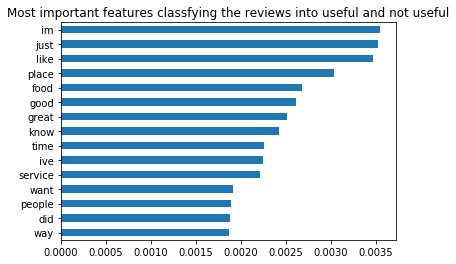

In [63]:
f1 = coef_useful_notuseful[-15:].plot(kind='barh', title="Most important features classfying the reviews into useful and not useful")

In [70]:
print(coef_useful_notuseful[0:30])

chipotle chicken    0.0
table small         0.0
removing            0.0
bread best          0.0
bread cheese        0.0
love trader         0.0
ended just          0.0
la tolteca          0.0
bread perfect       0.0
remoulade           0.0
pause               0.0
dances              0.0
pattern             0.0
minutes like        0.0
breadcrumbs         0.0
table looked        0.0
love indian         0.0
rest home           0.0
table guacamole     0.0
patty melt          0.0
table told          0.0
hidden away         0.0
table took          0.0
day visit           0.0
gary                0.0
area inside         0.0
employed            0.0
loved service       0.0
gated               0.0
peeked              0.0
dtype: float64


Random Forest for funny versus not funny:

In [71]:
model_random_forest_10trees.fit(X_text_train_tfidf, yelp_data_final_update['Review_category_funny_notfunny_binary'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [72]:
cross_val_score(model_random_forest_10trees, X_text_train_tfidf, yelp_data_final_update['Review_category_useful_notuseful_binary'], cv=5, scoring='roc_auc')
#array([ 0.63008201,  0.63175059,  0.62832185,  0.63270903,  0.62907765])

array([ 0.63008201,  0.63175059,  0.62832185,  0.63270903,  0.62907765])

In [73]:
coef_funny_notfunny = pd.Series(model_random_forest_10trees.feature_importances_, index=tfidf_transformer.get_feature_names()).sort_values(inplace=False)

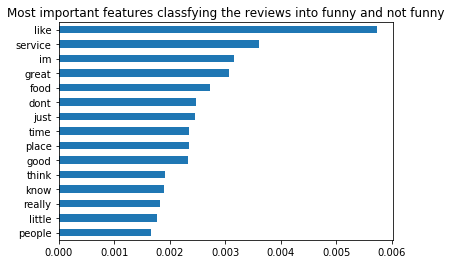

In [76]:
f1 = coef_funny_notfunny[-15:].plot(kind='barh', title="Most important features classfying the reviews into funny and not funny")

In [77]:
print(coef_funny_notfunny[0:30])

waiting 15 minutes     0.0
tableside guacamole    0.0
fontina burger         0.0
tack                   0.0
sauteed spinach        0.0
follows                0.0
tacos got              0.0
tacos ordered          0.0
sauced                 0.0
food allergies         0.0
sauce yummy            0.0
floats                 0.0
flavorful fresh        0.0
flavor ordered         0.0
appetizer platter      0.0
flakey                 0.0
takes lot              0.0
fixe menu              0.0
lunch combos           0.0
low rating             0.0
appetizer entrees      0.0
save bucks             0.0
love fries             0.0
lost business          0.0
table make             0.0
lot little             0.0
lot local              0.0
lot regulars           0.0
food happy hour        0.0
lots places            0.0
dtype: float64


Random Forest for cool not cool:

In [306]:
model_random_forest_10trees.fit(X_text_train_tfidf, yelp_data_final_update['Review_category_cool_notcool_binary'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [314]:
coef_cool_notcool = pd.Series(model_random_forest_10trees.feature_importances_, index=tfidf_transformer.get_feature_names()).sort_values(inplace=False)

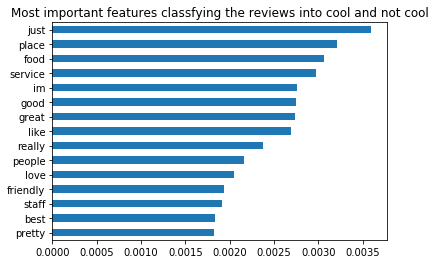

In [315]:
f1 = coef_cool_notcool[-15:].plot(kind='barh', title="Most important features classfying the reviews into cool and not cool")

In [81]:
print(coef_cool_notcool[0:30])

friendly patient            0.0
nice person                 0.0
went today lunch            0.0
nice man                    0.0
tobacco                     0.0
lifeless                    0.0
togo orders                 0.0
friendly just               0.0
nice gesture                0.0
friendly neighborhood       0.0
light fixtures              0.0
nice gave                   0.0
salad think                 0.0
told make                   0.0
nice break                  0.0
told time                   0.0
friends drinks              0.0
newbies                     0.0
friends food                0.0
friends going               0.0
tom kha                     0.0
lighten                     0.0
new town                    0.0
tomato lettuce              0.0
daikon                      0.0
tomatoes lettuce            0.0
high quality ingredients    0.0
went kitchen                0.0
new phoenix                 0.0
tons tvs                    0.0
dtype: float64


Modeling Session 1 Approach C: Logistic Regression

Use logistic Regression to classify the reivews into useful vs not useful:

In [254]:
model_logistic_regression=LogisticRegression()

In [255]:
y=yelp_data_final_update['Review_category_useful_notuseful_binary']
X=X_text_train_tfidf

In [257]:
cross_val_score(model_logistic_regression, X, y, cv=10, scoring='roc_auc').mean() #0.69805438247239127

0.69805438247239127

In [258]:
model_logistic_regression.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [259]:
coef_useful_notuseful_coef_logistic_regression = pd.DataFrame(list(zip(model_logistic_regression.coef_[0])), columns=['beta'], index=tfidf_transformer.get_feature_names())


In [329]:
coef_useful_notuseful_coef_logistic_regression['odds_coefficient'] = np.exp(coef_useful_notuseful_coef_logistic_regression.beta)

In [330]:
coef_useful_notuseful_coef_logistic_regression.sort_values('odds_coefficient', inplace=True, ascending=False)

Below are the top features that have the most positive impact or negative impact to the classfication:

In [331]:
top = 50
print ('(+):'  ,coef_useful_notuseful_coef_logistic_regression[:top].index)
print ('(-):'  , coef_useful_notuseful_coef_logistic_regression[-top:].index)



(+): Index(['rand', 'factor', 'jared', 'gabi', 'fez', 'lobbys', 'uye', 'pics',
       'yelpers', 'inch', 'yelper', 'carin', 'holy', 'heres', 'robyn',
       'lots parking', 'fucking', 'sweet republic', 'bec', 'bright', 'effing',
       'shit', 'stuffing', 'drift', 'worthy', 'decorated', 'cenpho', 'hell',
       'wtf', 'stalls', 'sampled', 'freakin', 'crappy', 'tejas', 'review',
       'brittle', 'matt', 'mr', 'abuse', 'joined', 'beloved', 'bullshit',
       'naked', 'sodas', 'indie', 'purses', 'pizzai', 'involving', 'recession',
       'cutie'],
      dtype='object')
(-): Index(['hampton', 'make worth', 'reason gave', 'friendly people',
       'wait service', 'dealing', 'raved', 'philadelphia', 'fascinating',
       'potstickers', 'great service food', 'business trip', 'great service',
       'pretty darn good', 'seated quickly', 'pretty pricey', 'wow factor',
       'greatly', 'issue', 'quiet', 'delish', 'fish fresh', 'reading reviews',
       'good waitress', 'time didnt', 'room impr

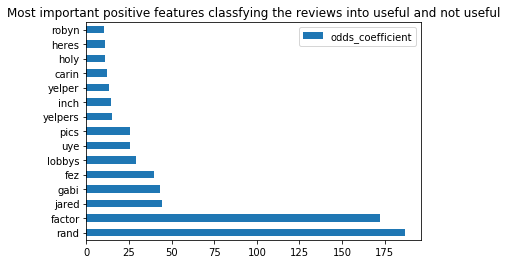

In [340]:
f1 = coef_useful_notuseful_coef_logistic_regression[:15][['odds_coefficient']].plot(kind='barh', title="Most important positive features classfying the reviews into useful and not useful")

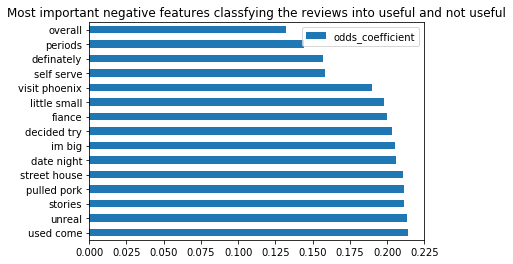

In [341]:
f1 = coef_useful_notuseful_coef_logistic_regression[-15:][['odds_coefficient']].plot(kind='barh', title="Most important negative features classfying the reviews into useful and not useful")

Use logistic Regression to classify the reivews into cool vs not cool:

In [264]:
y=yelp_data_final_update['Review_category_cool_notcool_binary']
X=X_text_train_tfidf

In [267]:
cross_val_score(model_logistic_regression, X, y, cv=10, scoring='roc_auc').mean() #0.691134864467701

0.691134864467701

In [268]:
model_logistic_regression.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [269]:
coef_cool_notcool_logistic_regression = pd.DataFrame(list(zip(model_logistic_regression.coef_[0])), columns=['beta'], index=tfidf_transformer.get_feature_names())


In [342]:
coef_cool_notcool_logistic_regression['odds_coefficient'] = np.exp(coef_cool_notcool_logistic_regression.beta)

In [343]:
coef_cool_notcool_logistic_regression.sort_values('odds_coefficient', inplace=True, ascending=False)

Below are the top features that have the most positive impact or negative impact to the classfication:

In [344]:
top = 50
print ('(+):'  ,coef_cool_notcool_logistic_regression[:top].index)
print ('(-):'  , coef_cool_notcool_logistic_regression[-top:].index)


(+): Index(['rand', 'factor', 'fez', 'gabi', 'uye', 'pics', 'robyn', 'moto',
       'yelper', 'shit', 'sweet republic', 'roosevelt', 'jared',
       'lots parking', 'sampled', 'ass', 'shiny', 'brownies', 'virgin',
       'joined', 'ya', 'lobbys', 'yelpers', 'cenpho', 'dear', 'carin', 'mrs',
       'lahna', 'bec', 'fucking', 'exotic', 'rocket', 'booty', 'sodas',
       'swear', 'bungalow', 'houstons', 'adorable', 'bands', 'thai hut',
       'river', 'importance', 'durants', 'blow', 'know', 'cutie', 'hell',
       'food want', 'ho', 'cibo'],
      dtype='object')
(-): Index(['pet friendly', 'spendy', 'scam', 'best choice', 'menu choices',
       'issue', 'ratings', 'small town', 'great beers', 'messed',
       'food good great', 'skimpy', 'staff', 'advertised', 'trained',
       'dont miss', 'watered', 'like say', 'dealing', 'atleast',
       'star service', 'bar place', 'server didnt', 'far best', 'feel welcome',
       'early morning', 'jewish sliders', 'gilbert', 'generally good',
   

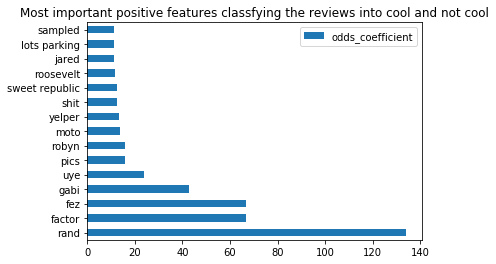

In [345]:
f1 = coef_cool_notcool_logistic_regression[:15][['odds_coefficient']].plot(kind='barh', title="Most important positive features classfying the reviews into cool and not cool")

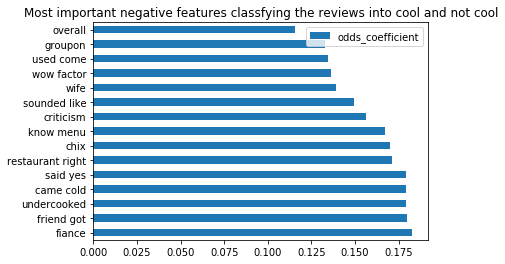

In [346]:
f1 = coef_cool_notcool_logistic_regression[-15:][['odds_coefficient']].plot(kind='barh', title="Most important negative features classfying the reviews into cool and not cool")

Use logistic Regression to classify the reivews into funny vs not funny:

In [278]:
y=yelp_data_final_update['Review_category_funny_notfunny_binary']
X=X_text_train_tfidf

In [282]:
cross_val_score(model_logistic_regression, X, y, cv=10, scoring='roc_auc').mean() #0.71803085846299186

0.71803085846299186

In [283]:
model_logistic_regression.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [284]:
coef_funny_notfunny_logistic_regression = pd.DataFrame(list(zip(model_logistic_regression.coef_[0])), columns=['beta'], index=tfidf_transformer.get_feature_names())


In [347]:
coef_funny_notfunny_logistic_regression['odds_coefficient'] = np.exp(coef_funny_notfunny_logistic_regression.beta)

In [348]:
coef_funny_notfunny_logistic_regression.sort_values('odds_coefficient',inplace=True)

Below are the top features that have the most positive impact or negative impact to the classfication:

In [349]:
top = 50
print ('(+):'  ,coef_funny_notfunny_logistic_regression[:top].index)
print ('(-):'  , coef_funny_notfunny_logistic_regression[-top:].index)


(+): Index(['good mix', 'recommend', 'overall', 'boyfriend', 'hole wall', 'raved',
       'great', 'mom pop', 'wife', 'zinburger', 'place check',
       'room improvement', 'fiance', 'signed', 'said yes', 'drive way',
       'typically', 'frequently', 'night just', 'make sure', 'husband',
       'undercooked', 'disappointed', 'excellent', 'date night', 'biased',
       'picazzos', 'disappoints', 'quieter', 'just moved', 'memorial',
       'used love', 'breakfast good', 'wow factor', 'boxing', 'stop time',
       'groupon', 'little late', 'talented', 'greatly', 'extra crispy',
       'mac salad', 'place isnt', 'scottsdale location', 'smash', 'smokey',
       'atleast', 'trout', 'server didnt', 'sals'],
      dtype='object')
(-): Index(['screaming', 'als', 'heres', 'stole', 'inner', 'hate', 'joined',
       'ghetto', 'ugly', 'mean', 'swear', 'crappy', 'lets', 'yelper',
       'lots parking', 'zoo', 'rocket', 'mr', 'gay', 'boobs', 'booze',
       'cenpho', 'god', 'drunk', 'carin', 'dear',

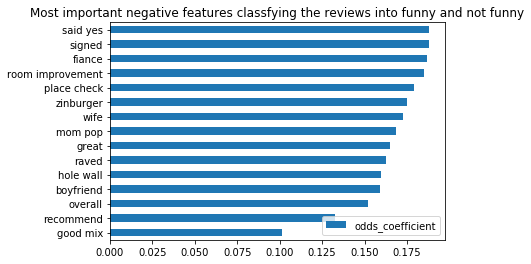

In [350]:
f1 = coef_funny_notfunny_logistic_regression[:15][['odds_coefficient']].plot(kind='barh', title="Most important negative features classfying the reviews into funny and not funny")

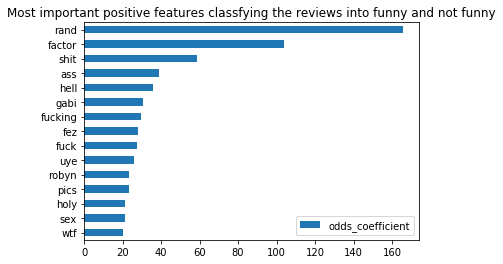

In [351]:
f1 = coef_funny_notfunny_logistic_regression[-15:][['odds_coefficient']].plot(kind='barh', title="Most important positive features classfying the reviews into funny and not funny")

Modeling Session 2:

In the session 2, I'm going to use Naive Bayes model for classify the reviews into the following categories:

useful, cool, funny, neutral and no categorization:

In [ ]:
set(yelp_data_final_update['Review_category_coolest_funniest_mostuseful'])

For this model, we are going only use part of the dataset that has the following categories in the Review_category_coolest_funniest_mostuseful field:

- cool
- funny
- useful
- neutral
- no review

In [49]:
cross_val_score(model_NB, X_train_countVectorizer, yelp_data_final_update['Review_category_coolest_funniest_mostuseful'], cv=5)

array([ 0.35068336,  0.35652825,  0.35029305,  0.35130821,  0.35046892])

In [50]:
model_NB.fit(X_train_countVectorizer, yelp_data_final_update['Review_category_coolest_funniest_mostuseful'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Use the features trained by teh tfidf vectorizer to train the Naive Bayes Model:

In [55]:
model_NB.fit(X_text_train_tfidf, yelp_data_final_update['Review_category_coolest_funniest_mostuseful'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [57]:
cross_val_score(model_NB, X_text_train_tfidf, yelp_data_final_update['Review_category_coolest_funniest_mostuseful'], cv=5)

array([ 0.42291002,  0.42199776,  0.41895498,  0.42079665,  0.42073232])

Note: As the accuracy rate is very low in this case, I'm not going to use the model result to get insights. Need to get more review data with more votes to improve the accuracy of the model.

Modeling Session 3:

In the session 3, I'm going to use Naive Bayes model to classify the reviews into 0 to 7 (8 tiers) based on the number of votes the reviews have got.

In [68]:
yelp_data_final_update.columns
yelp_data_final_update.total_review_votes_count.describe()


count    200471.000000
mean          2.954572
std           5.631105
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max         159.000000
Name: total_review_votes_count, dtype: float64

In [60]:
set(yelp_data_final_update['total_review_votes_count_grouping'])

{0, 1, 2, 3, 4, 5, 6, 7}

In [61]:
model_NB.fit(X_text_train_tfidf, yelp_data_final_update['total_review_votes_count_grouping'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [64]:
cross_val_score(model_NB, X_text_train_tfidf, yelp_data_final_update['total_review_votes_count_grouping'], cv=5)
#array([ 0.50736926,  0.50349179,  0.50067342,  0.50409059,  0.50311783])

array([ 0.50736926,  0.50349179,  0.50067342,  0.50409059,  0.50311783])

Note: As the accuracy rate is very low in this case, I'm not going to use the model result to get insights. Need to get more review data with more votes to improve the accuracy of the model.

Modeling Session 4: 

In the session 2, I'm going to use Naive Bayes model and Logistic Regression for classify the reviews into the following categories:

Group 1(1): Review votes is greater than average

Group 2(0): Review votes is below average

Calculate the average review votes:

In [77]:
yelp_data_final_update.total_review_votes_count.mean() #2.954571982980082

2.954571982980082

Create the groupings for the reviews based on the #votes:
votes >=3 and Votes<3

In [82]:
yelp_data_final_update.loc[yelp_data_final_update['total_review_votes_count']>=3, 'total_review_votes_comparedwith_average_grouping']=1
yelp_data_final_update.loc[yelp_data_final_update['total_review_votes_count']<3, 'total_review_votes_comparedwith_average_grouping']=0

In [84]:
cross_val_score(model_NB, X_train_countVectorizer, yelp_data_final_update['total_review_votes_comparedwith_average_grouping'], cv=5)

array([ 0.67876294,  0.68316955,  0.67820622,  0.67912905,  0.67995211])

In [86]:
cross_val_score(model_NB, X_train_countVectorizer, yelp_data_final_update['total_review_votes_comparedwith_average_grouping'], cv=5, scoring='roc_auc')

array([ 0.67136325,  0.66827215,  0.6618135 ,  0.67518556,  0.67314961])

In [87]:
model_NB.fit(X_text_train_tfidf, yelp_data_final_update['total_review_votes_comparedwith_average_grouping'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [91]:
import pandas as pd
coef_totalvotes_above_average_below_averga= pd.DataFrame(model_NB.coef_, columns=tfidf_transformer.get_feature_names()).T

In [494]:
top = 20
for cols in coef_totalvotes_above_average_below_averga:
    s = coef_review_votes_tier_tfidf[[cols]].sort_values(cols)
    print ("%-20s  (+) %s" % (cols, ", ".join(s.iloc[-top:].index)))
    print ("%-20s  (-) %s" % ("", ", ".join(s.iloc[:top].index)))


0                     (+) try, dont, little, chicken, ive, staff, friendly, pizza, nice, best, time, really, just, love, like, service, place, food, good, great
                      (-) beautiful carin, carin, uye, bec, certainly dont, really dont think, server comes, rand, cane sugar, giggling, robyn, inevitable, wasi, forgiven, goats, translate, bottle champagne, todayi, bastards, ridden


Use logistic Regression:

In [360]:
model_logistic_regression=LogisticRegression()

In [361]:
cross_val_score(model_logistic_regression, X_train_countVectorizer, yelp_data_final_update['total_review_votes_comparedwith_average_grouping'], cv=5, scoring='roc_auc')

array([ 0.6489953 ,  0.65282449,  0.64249273,  0.64516214,  0.64682491])

In [362]:
model_logistic_regression.fit(X_text_train_tfidf, yelp_data_final_update['total_review_votes_comparedwith_average_grouping'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [363]:
import pandas as pd
coef_totalvotes_above_average_below_averga_logistic= pd.DataFrame(model_logistic_regression.coef_, columns=tfidf_transformer.get_feature_names()).T

In [493]:
top = 20
for cols in coef_totalvotes_above_average_below_averga_logistic:
    s = coef_review_votes_tier_tfidf[[cols]].sort_values(cols)
    print ("%-20s  (+) %s" % (cols, ", ".join(s.iloc[-top:].index)))
    print ("%-20s  (-) %s" % ("", ", ".join(s.iloc[:top].index)))


0                     (+) try, dont, little, chicken, ive, staff, friendly, pizza, nice, best, time, really, just, love, like, service, place, food, good, great
                      (-) beautiful carin, carin, uye, bec, certainly dont, really dont think, server comes, rand, cane sugar, giggling, robyn, inevitable, wasi, forgiven, goats, translate, bottle champagne, todayi, bastards, ridden


Modeling Session 5: Regression model to predict the total number of review votes a review is going to get:

Create the dummy variables for the business categories:

In [549]:
yelp_data_final_update['business categories']=yelp_data_final_update['business categories'].apply(func_to_lower_case)

In [548]:
yelp_data_final_update.loc[:,'business_category_dummy_restaurant_food']=0

In [550]:
yelp_data_final_update.loc[yelp_data_final_update['business categories'].str.contains("food"), 'business_category_dummy_restaurant_food']=1

In [551]:
yelp_data_final_update.loc[yelp_data_final_update['business categories'].str.contains("restaurant"), 'business_category_dummy_restaurant_food']=1

In [560]:
yelp_data_final_update.loc[:,'business_category_dummy_shopping']=0

yelp_data_final_update.loc[yelp_data_final_update['business categories'].str.contains("shopping"), 'business_category_dummy_shopping']=1

In [561]:
len(set(yelp_data_final_update.business_id)) #8281 business in total
len(set(yelp_data_final_update.loc[yelp_data_final_update['business_category_dummy_restaurant_food']==1, 'business_id']))#4828 business can be grouped into the food/restaurant categories
len(set(yelp_data_final_update.loc[yelp_data_final_update['business_category_dummy_shopping']==1, 'business_id']))#1191 business can be grouped into the food/restaurant categories

1191

Look at the relationship between business_category_dummy_restaurant_food/business_category_dummy_shopping and total_review_votes_count:

In [563]:
yelp_data_final_update[['business_category_dummy_restaurant_food', 'total_review_votes_count']].corr()


,business_category_dummy_restaurant_food,total_review_votes_count
business_category_dummy_restaurant_food,1.000000,-0.046619
total_review_votes_count,-0.046619,1.000000


In [564]:
yelp_data_final_update[['business_category_dummy_shopping', 'total_review_votes_count']].corr()


,business_category_dummy_shopping,total_review_votes_count
business_category_dummy_shopping,1.000000,0.032427
total_review_votes_count,0.032427,1.000000


Based on the naive bayes model and the logistic regressions. 
Below are the top 10 keywords that identify between the reviews with votes above average and below average:

time, really, just, love, like, service, place, food, good, great
 

Get the dummy variables based on the keywords above:

In [495]:
yelp_data_final_update.loc[:,'review_good_dummy']=0
yelp_data_final_update.loc[:,'review_time_dummy']=0
yelp_data_final_update.loc[:,'review_really_dummy']=0
yelp_data_final_update.loc[:,'review_just_dummy']=0
yelp_data_final_update.loc[:,'review_love_dummy']=0
yelp_data_final_update.loc[:,'review_like_dummy']=0
yelp_data_final_update.loc[:,'review_service_dummy']=0
yelp_data_final_update.loc[:,'review_place_dummy']=0
yelp_data_final_update.loc[:,'review_food_dummy']=0
yelp_data_final_update.loc[:,'review_great_dummy']=0

yelp_data_final_update.loc[:,'review_try_dummy']=0
yelp_data_final_update.loc[:,'review_dont_dummy']=0
yelp_data_final_update.loc[:,'review_chicken_dummy']=0
yelp_data_final_update.loc[:,'review_ive_dummy']=0
yelp_data_final_update.loc[:,'review_staff_dummy']=0
yelp_data_final_update.loc[:,'review_friendly_dummy']=0
yelp_data_final_update.loc[:,'review_pizza_dummy']=0
yelp_data_final_update.loc[:,'review_best_dummy']=0
yelp_data_final_update.loc[:,'review_little_dummy']=0
yelp_data_final_update.loc[:,'review_nice_dummy']=0



In [496]:
yelp_data_final_update.loc[yelp_data_final_update['text'].str.contains("good"), 'review_good_dummy']=1
yelp_data_final_update.loc[yelp_data_final_update['text'].str.contains("time"), 'review_time_dummy']=1
yelp_data_final_update.loc[yelp_data_final_update['text'].str.contains("really"), 'review_really_dummy']=1
yelp_data_final_update.loc[yelp_data_final_update['text'].str.contains("just"), 'review_just_dummy']=1
yelp_data_final_update.loc[yelp_data_final_update['text'].str.contains("love"), 'review_love_dummy']=1
yelp_data_final_update.loc[yelp_data_final_update['text'].str.contains("like"), 'review_like_dummy']=1
yelp_data_final_update.loc[yelp_data_final_update['text'].str.contains("service"), 'review_service_dummy']=1
yelp_data_final_update.loc[yelp_data_final_update['text'].str.contains("place"), 'review_place_dummy']=1
yelp_data_final_update.loc[yelp_data_final_update['text'].str.contains("food"), 'review_food_dummy']=1
yelp_data_final_update.loc[yelp_data_final_update['text'].str.contains("great"), 'review_great_dummy']=1


yelp_data_final_update.loc[yelp_data_final_update['text'].str.contains("try"), 'review_try_dummy']=1
yelp_data_final_update.loc[yelp_data_final_update['text'].str.contains("dont"), 'review_dont_dummy']=1
yelp_data_final_update.loc[yelp_data_final_update['text'].str.contains("chicken"), 'review_chicken_dummy']=1
yelp_data_final_update.loc[yelp_data_final_update['text'].str.contains("ive"), 'review_ive_dummy']=1
yelp_data_final_update.loc[yelp_data_final_update['text'].str.contains("staff"), 'review_staff_dummy']=1
yelp_data_final_update.loc[yelp_data_final_update['text'].str.contains("friendly"), 'review_friendly_dummy']=1
yelp_data_final_update.loc[yelp_data_final_update['text'].str.contains("pizza"), 'review_pizza_dummy']=1
yelp_data_final_update.loc[yelp_data_final_update['text'].str.contains("best"), 'review_best_dummy']=1
yelp_data_final_update.loc[yelp_data_final_update['text'].str.contains("little"), 'review_little_dummy']=1
yelp_data_final_update.loc[yelp_data_final_update['text'].str.contains("nice"), 'review_nice_dummy']=1




Create a variable called text_string_length to get the length of the review text:

In [371]:
# Create a function to get the length of the string:
def func_string_length(string):
        return len(string)

In [380]:
yelp_data_final_update['text_string_length']=yelp_data_final_update['text'].apply(func_string_length)

Create a variable to calculate the number of days between the review date and '2018-1-1'

In [529]:
import datetime, calendar
from datetime import date

In [530]:
def func_calculate_number_of_days(date1):
    date_format = "%m/%d/%Y"
    date2='2018-1-1'
    date1 = date(*map(int, date1.split('-')))
    date2 = date(*map(int, date2.split('-')))
    delta = date2 - date1
    delta=delta.days
    return delta

In [532]:
yelp_data_final_update['review_recency']=yelp_data_final_update['review date'].apply(func_calculate_number_of_days)

Define the X and y for the regression model:

In [504]:
y=yelp_data_final_update['total_review_votes_count']
features=[ 'user review_count_sqrt','text_string_length',  'review_good_dummy', 'review_time_dummy', 'review_really_dummy','review_just_dummy', 'review_love_dummy', 'review_like_dummy','review_service_dummy', 'review_place_dummy', 'review_food_dummy','review_great_dummy','review_try_dummy','review_dont_dummy', 'review_chicken_dummy', 'review_ive_dummy','review_staff_dummy', 'review_friendly_dummy', 'review_pizza_dummy','review_best_dummy', 'review_little_dummy', 'review_nice_dummy']
X=yelp_data_final_update[features]

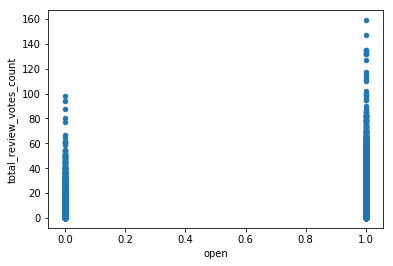

In [439]:
%matplotlib inline
import seaborn as sns

yelp_data_final_update.plot(kind="scatter", x="open", y="total_review_votes_count")

Relationship between open and total_review_votes_count:

In [435]:
yelp_data_final_update[['open', 'total_review_votes_count']].corr()

,open,total_review_votes_count
open,1.000000,-0.017641
total_review_votes_count,-0.017641,1.000000


Relationship between business review_count and total_review_votes_count

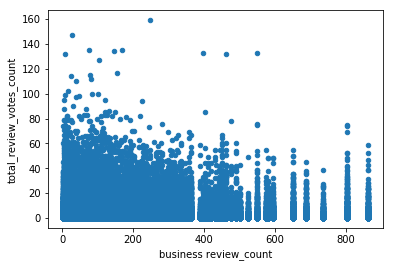

In [438]:
yelp_data_final_update.plot(kind="scatter", x="business review_count", y="total_review_votes_count")

In [434]:
yelp_data_final_update[['business review_count', 'total_review_votes_count']].corr()

,business review_count,total_review_votes_count
business review_count,1.000000,0.035157
total_review_votes_count,0.035157,1.000000


Relationship between business stars  and total_review_votes_count

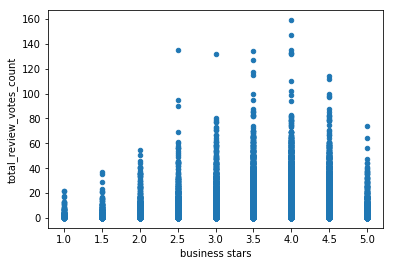

In [437]:
yelp_data_final_update.plot(kind="scatter", x="business stars", y="total_review_votes_count")

In [441]:
yelp_data_final_update[['business stars', 'total_review_votes_count']].corr()

,business stars,total_review_votes_count
business stars,1.000000,0.009682
total_review_votes_count,0.009682,1.000000


Relationship between user average stars and total_review_votes_count

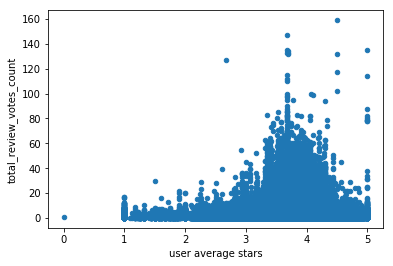

In [442]:

yelp_data_final_update.plot(kind="scatter", x="user average stars", y="total_review_votes_count")

In [443]:
yelp_data_final_update[['user average stars', 'total_review_votes_count']].corr()

,user average stars,total_review_votes_count
user average stars,1.000000,-0.000745
total_review_votes_count,-0.000745,1.000000


Relationship between user review_count and total_review_votes_count

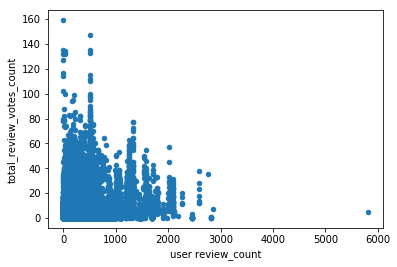

In [444]:

yelp_data_final_update.plot(kind="scatter", x="user review_count", y="total_review_votes_count")

In [445]:
yelp_data_final_update[['user review_count', 'total_review_votes_count']].corr()

,user review_count,total_review_votes_count
user review_count,1.000000,0.334341
total_review_votes_count,0.334341,1.000000


Transform the user review_count to the square root

In [473]:

yelp_data_final_update['user review_count_sqrt']=np.sqrt(yelp_data_final_update['user review_count'])

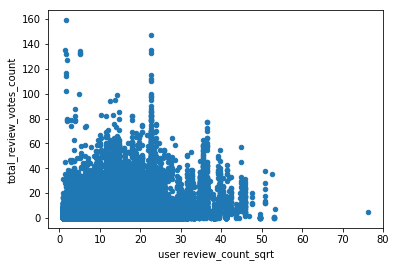

In [474]:

yelp_data_final_update.plot(kind="scatter", x="user review_count_sqrt", y="total_review_votes_count")

In [475]:
yelp_data_final_update[['user review_count_sqrt', 'total_review_votes_count']].corr()

,user review_count_sqrt,total_review_votes_count
user review_count_sqrt,1.000000,0.359044
total_review_votes_count,0.359044,1.000000



Relationship between total_number_of_checkins and total_review_votes_count

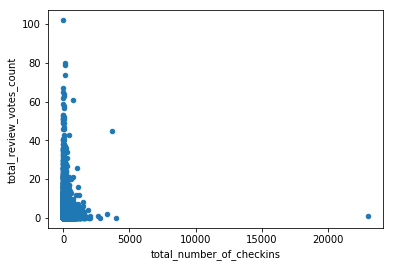

In [446]:
yelp_data_final_update.plot(kind="scatter", x="total_number_of_checkins", y="total_review_votes_count")

In [447]:
yelp_data_final_update[['total_number_of_checkins', 'total_review_votes_count']].corr()

,total_number_of_checkins,total_review_votes_count
total_number_of_checkins,1.000000,-0.005561
total_review_votes_count,-0.005561,1.000000



Relationship between text_string_length and total_review_votes_count

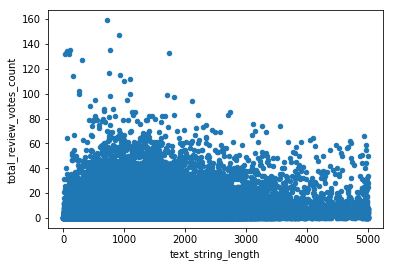

In [448]:
yelp_data_final_update.plot(kind="scatter", x="text_string_length", y="total_review_votes_count")

In [449]:
yelp_data_final_update[['text_string_length', 'total_review_votes_count']].corr()

,text_string_length,total_review_votes_count
text_string_length,1.000000,0.294172
total_review_votes_count,0.294172,1.000000


In [478]:
yelp_data_final_update['text_string_length_log']=np.log(yelp_data_final_update['text_string_length'])
yelp_data_final_update['text_string_length_sqrt']=np.sqrt(yelp_data_final_update['text_string_length'])

In [479]:
yelp_data_final_update[['text_string_length_sqrt', 'total_review_votes_count']].corr()

,text_string_length_sqrt,total_review_votes_count
text_string_length_sqrt,1.00000,0.29696
total_review_votes_count,0.29696,1.00000


Relationship between text dummy variables and total_review_votes_count

In [454]:
yelp_data_final_update[['review_good_dummy', 'total_review_votes_count']].corr()

,review_good_dummy,total_review_votes_count
review_good_dummy,1.000000,0.046182
total_review_votes_count,0.046182,1.000000


In [456]:
yelp_data_final_update[['review_time_dummy', 'total_review_votes_count']].corr()

,review_time_dummy,total_review_votes_count
review_time_dummy,1.000000,0.092767
total_review_votes_count,0.092767,1.000000


In [457]:
yelp_data_final_update[['review_really_dummy', 'total_review_votes_count']].corr()

,review_really_dummy,total_review_votes_count
review_really_dummy,1.000000,0.086369
total_review_votes_count,0.086369,1.000000


In [458]:
yelp_data_final_update[['review_just_dummy', 'total_review_votes_count']].corr()

,review_just_dummy,total_review_votes_count
review_just_dummy,1.000000,0.127543
total_review_votes_count,0.127543,1.000000


In [459]:
yelp_data_final_update[['review_place_dummy', 'total_review_votes_count']].corr()

,review_place_dummy,total_review_votes_count
review_place_dummy,1.000000,0.049612
total_review_votes_count,0.049612,1.000000


In [460]:
yelp_data_final_update[['review_food_dummy', 'total_review_votes_count']].corr()

,review_food_dummy,total_review_votes_count
review_food_dummy,1.000000,0.011289
total_review_votes_count,0.011289,1.000000


In [461]:
yelp_data_final_update[['review_great_dummy', 'total_review_votes_count']].corr()

,review_great_dummy,total_review_votes_count
review_great_dummy,1.000000,0.003599
total_review_votes_count,0.003599,1.000000


Discover the relationship between the recency of the review and review votes:

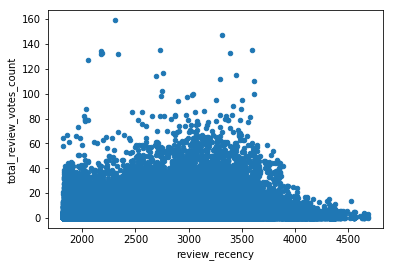

In [533]:
yelp_data_final_update.plot(kind="scatter", x="review_recency", y="total_review_votes_count")

In [534]:
yelp_data_final_update[['review_recency', 'total_review_votes_count']].corr()

,review_recency,total_review_votes_count
review_recency,1.000000,0.247102
total_review_votes_count,0.247102,1.000000


Create the regression model:

In [488]:
from sklearn.linear_model import LinearRegression

In [565]:
yelp_data_final_update.columns

Index(['Unnamed: 0', 'business_id', 'checkin_info', 'business categories',
       'business city', 'full_address', 'latitude', 'longitude',
       'business name', 'neighborhoods', 'open', 'business review_count',
       'business stars', 'business state', 'review date', 'review_id', 'text',
       'user_id', 'review votes', 'user average stars', 'user_name',
       'user review_count', 'user_votes', 'cool', 'funny', 'useful',
       'Review_category_useful_notuseful', 'Review_category_funny_notfunny',
       'Review_category_cool_notcool',
       'Review_category_coolest_funniest_mostuseful',
       'total_review_votes_count', 'total_review_votes_count_grouping',
       'total_number_of_checkins', 'total_user_review_votes',
       'total_review_votes_comparedwith_average_grouping',
       'Review_category_useful_notuseful_binary',
       'Review_category_cool_notcool_binary',
       'Review_category_funny_notfunny_binary', 'text_string_length',
       'review_good_dummy', 'review_time

In [570]:
y=yelp_data_final_update['total_review_votes_count']
features=['business_category_dummy_shopping', 'user review_count_sqrt','text_string_length',  'review_good_dummy', 'review_time_dummy', 'review_really_dummy','review_just_dummy', 'review_love_dummy', 'review_like_dummy','review_service_dummy', 'review_place_dummy', 'review_food_dummy','review_great_dummy','review_try_dummy','review_dont_dummy', 'review_chicken_dummy', 'review_ive_dummy','review_staff_dummy', 'review_friendly_dummy', 'review_pizza_dummy','review_best_dummy', 'review_little_dummy', 'review_nice_dummy','review_recency']
X=yelp_data_final_update[features]

In [571]:

model=LinearRegression()

model.fit(X,y)
model.score(X,y)
results=model.fit(X,y)
print(results.intercept_,results.coef_)


-4.41599820465 [ 0.07799086  0.23192861  0.0024035  -0.39591096 -0.05215772 -0.15939086
  0.03535329  0.28753097  0.09202092 -0.24232047 -0.21698256 -0.20929305
 -0.26904963 -0.06714959 -0.25543372 -0.18757034 -0.0302891  -0.10684357
 -0.01685124 -0.11165381 -0.07089799  0.00520229 -0.53865402  0.00167474]


In [572]:
model.score(X,y) #R squared

0.21422688468151785

Conclustion from the regression model:

For the regression model, we are using the following variables as independent variables:
user review_count_sqrt
text_string_length
review_good_dummy
review_time_dummy
review_really_dummy
review_just_dummy
review_love_dummy
review_like_dummy
review_service_dummy
review_place_dummy
review_food_dummy
review_great_dummy
review_try_dummy
review_dont_dummy
review_chicken_dummy
review_ive_dummy
review_staff_dummy
review_friendly_dummy
review_pizza_dummy
review_best_dummy
review_little_dummy
review_nice_dummy

The R squared is the 21%, which is not good for a making the prediction.

The next step is to get more data for the model.
